In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df=pd.read_csv(url, sep=";")

# Renombrar columnas a snake_case
df.columns = (df.columns
              .str.strip()
              .str.lower()
              .str.replace(' ', '_')
              .str.replace(r'[^\w_]', '', regex=True))

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [118]:
# NAs y duplicados
df.isna().sum(), df.duplicated().sum()
# Separar numéricas (todas menos 'quality')
num_cols = [c for c in df.columns if c != "quality"]


In [119]:
#analisis descriptivo con sesgo (para medir la asimetria, cercano a 0 lo ideal) y kurtosis (mide el peso de las colas)
desc = df[num_cols].describe().T
desc["skew"] = df[num_cols].skew()
desc["kurt"] = df[num_cols].kurt()
desc


,count,mean,std,min,25%,50%,75%,max,skew,kurt
fixed_acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000,0.982751,1.132143
volatile_acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000,0.671593,1.225542
citric_acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000,0.318337,-0.788998
residual_sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000,4.540655,28.617595
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100,5.680347,41.715787
free_sulfur_dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000,1.250567,2.023562
total_sulfur_dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000,1.515531,3.809824
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369,0.071288,0.934079
ph,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000,0.193683,0.806943
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000,2.428672,11.720251


In [120]:
#los datos indican que muuuuuy probablemente  residual_sugar, chlorides y sulphates no sean normales.
#Tampoco total_sulfur_dioxide


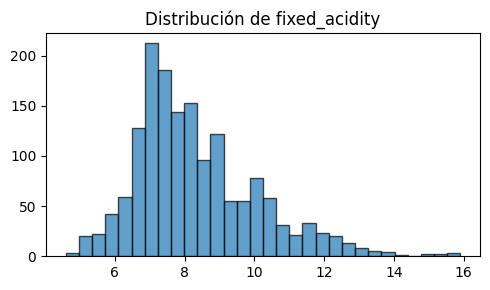

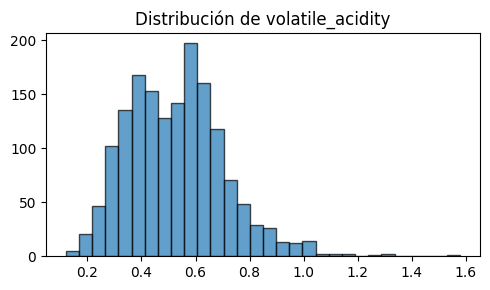

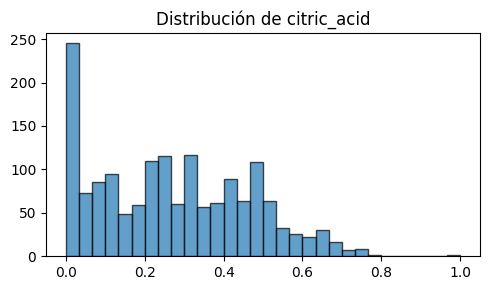

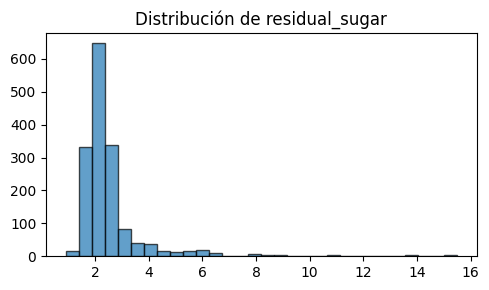

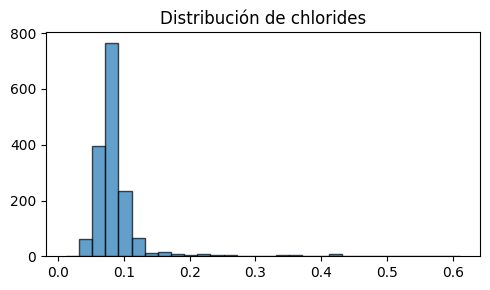

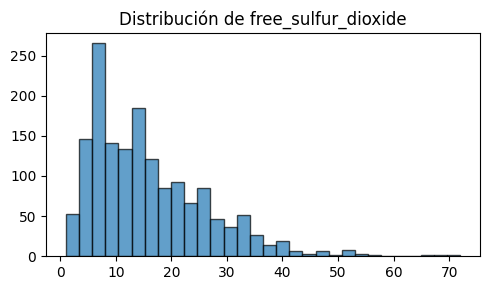

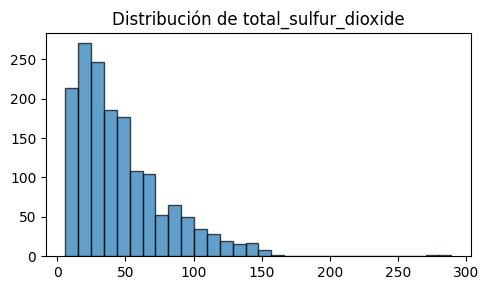

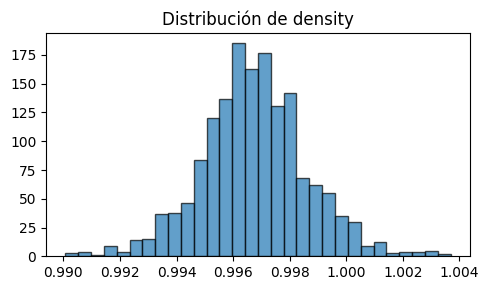

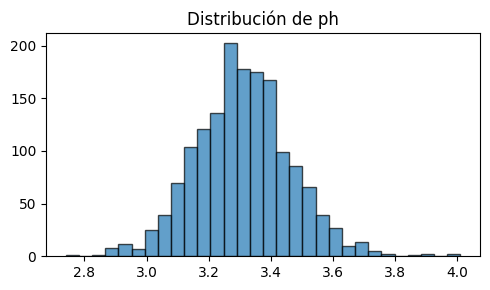

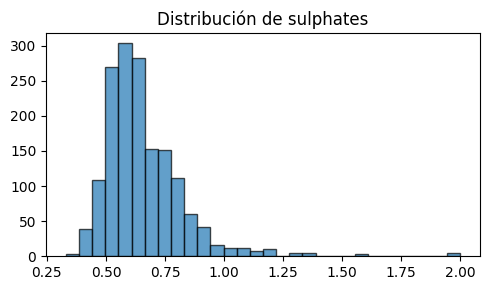

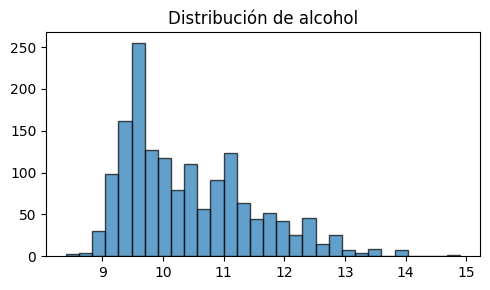

In [121]:
#histogramas para ver la distribucion de las variables
for c in num_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df[c], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f"Distribución de {c}")
    plt.tight_layout()
    plt.show()


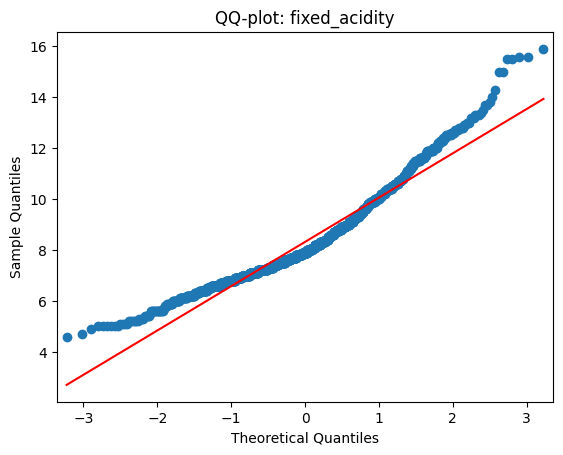

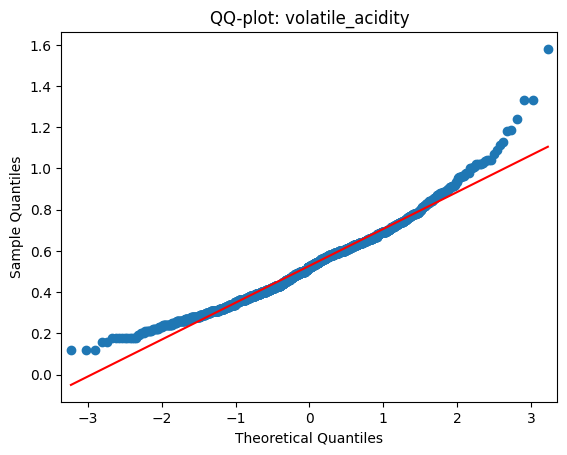

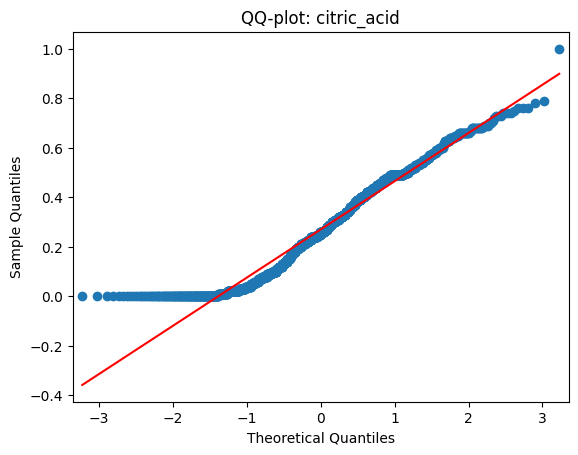

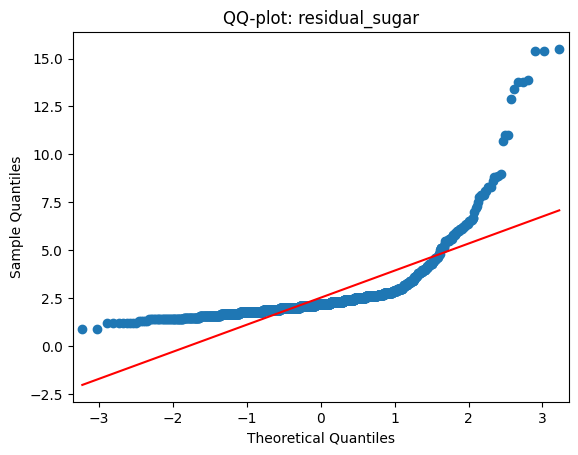

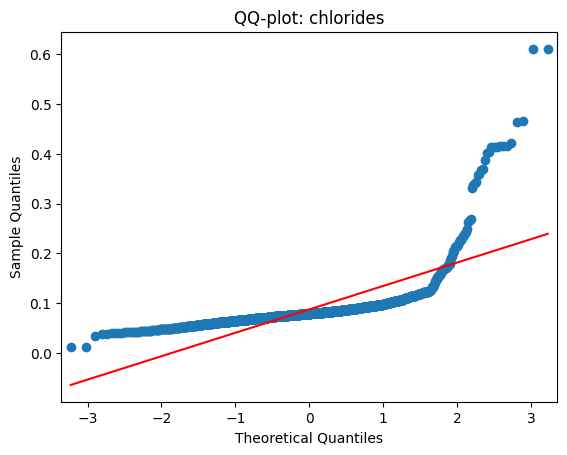

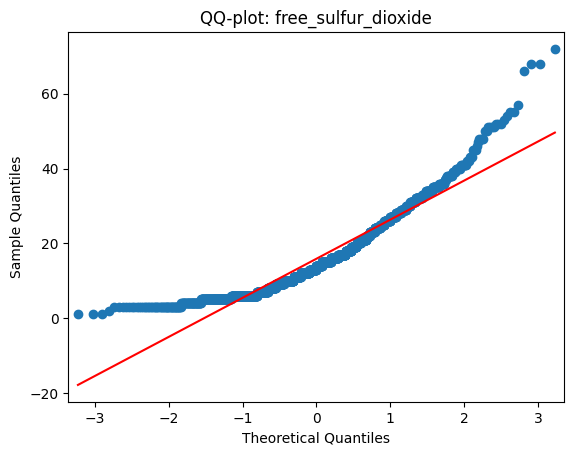

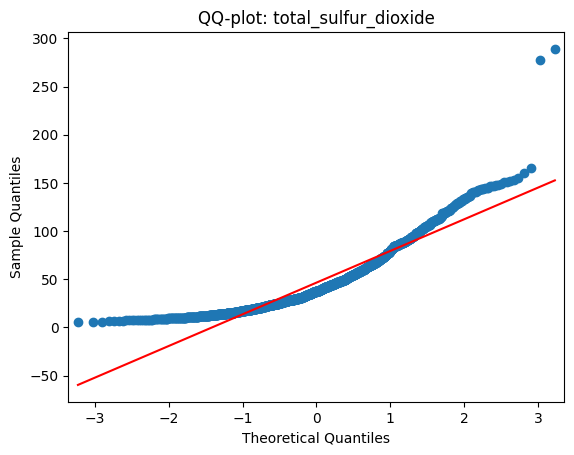

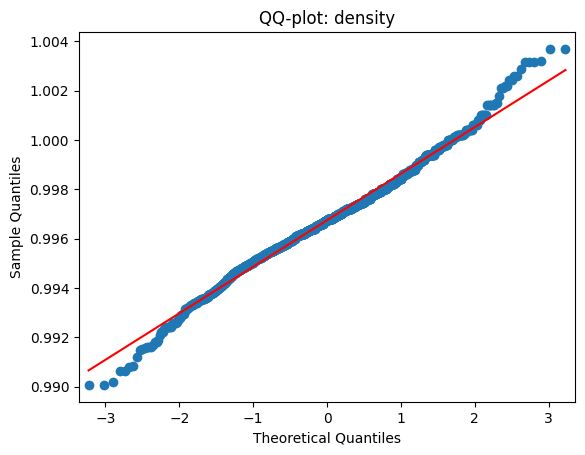

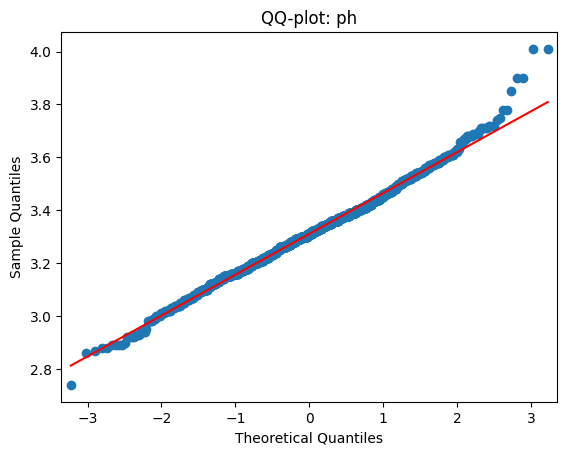

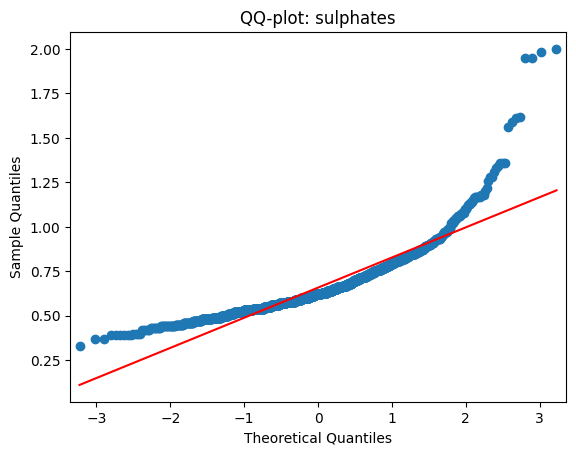

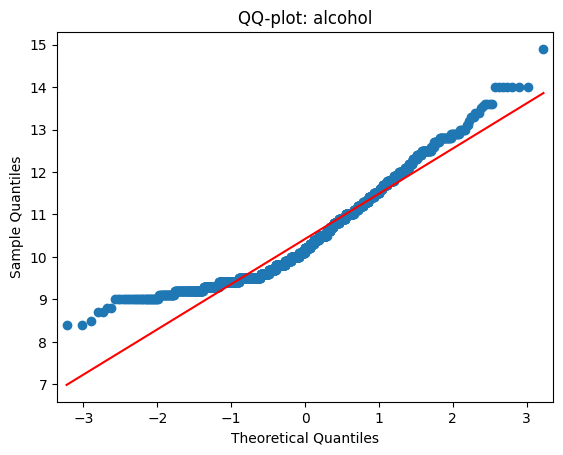

In [122]:
#los histogramas mjuestran distribuciones variadas, vamos a ver los QQplots
from scipy import stats
import statsmodels.api as sm
#QQ-PLoot
for c in num_cols:
    sm.qqplot(df[c].dropna(), line='s')
    plt.title(f"QQ-plot: {c}")
    plt.show()


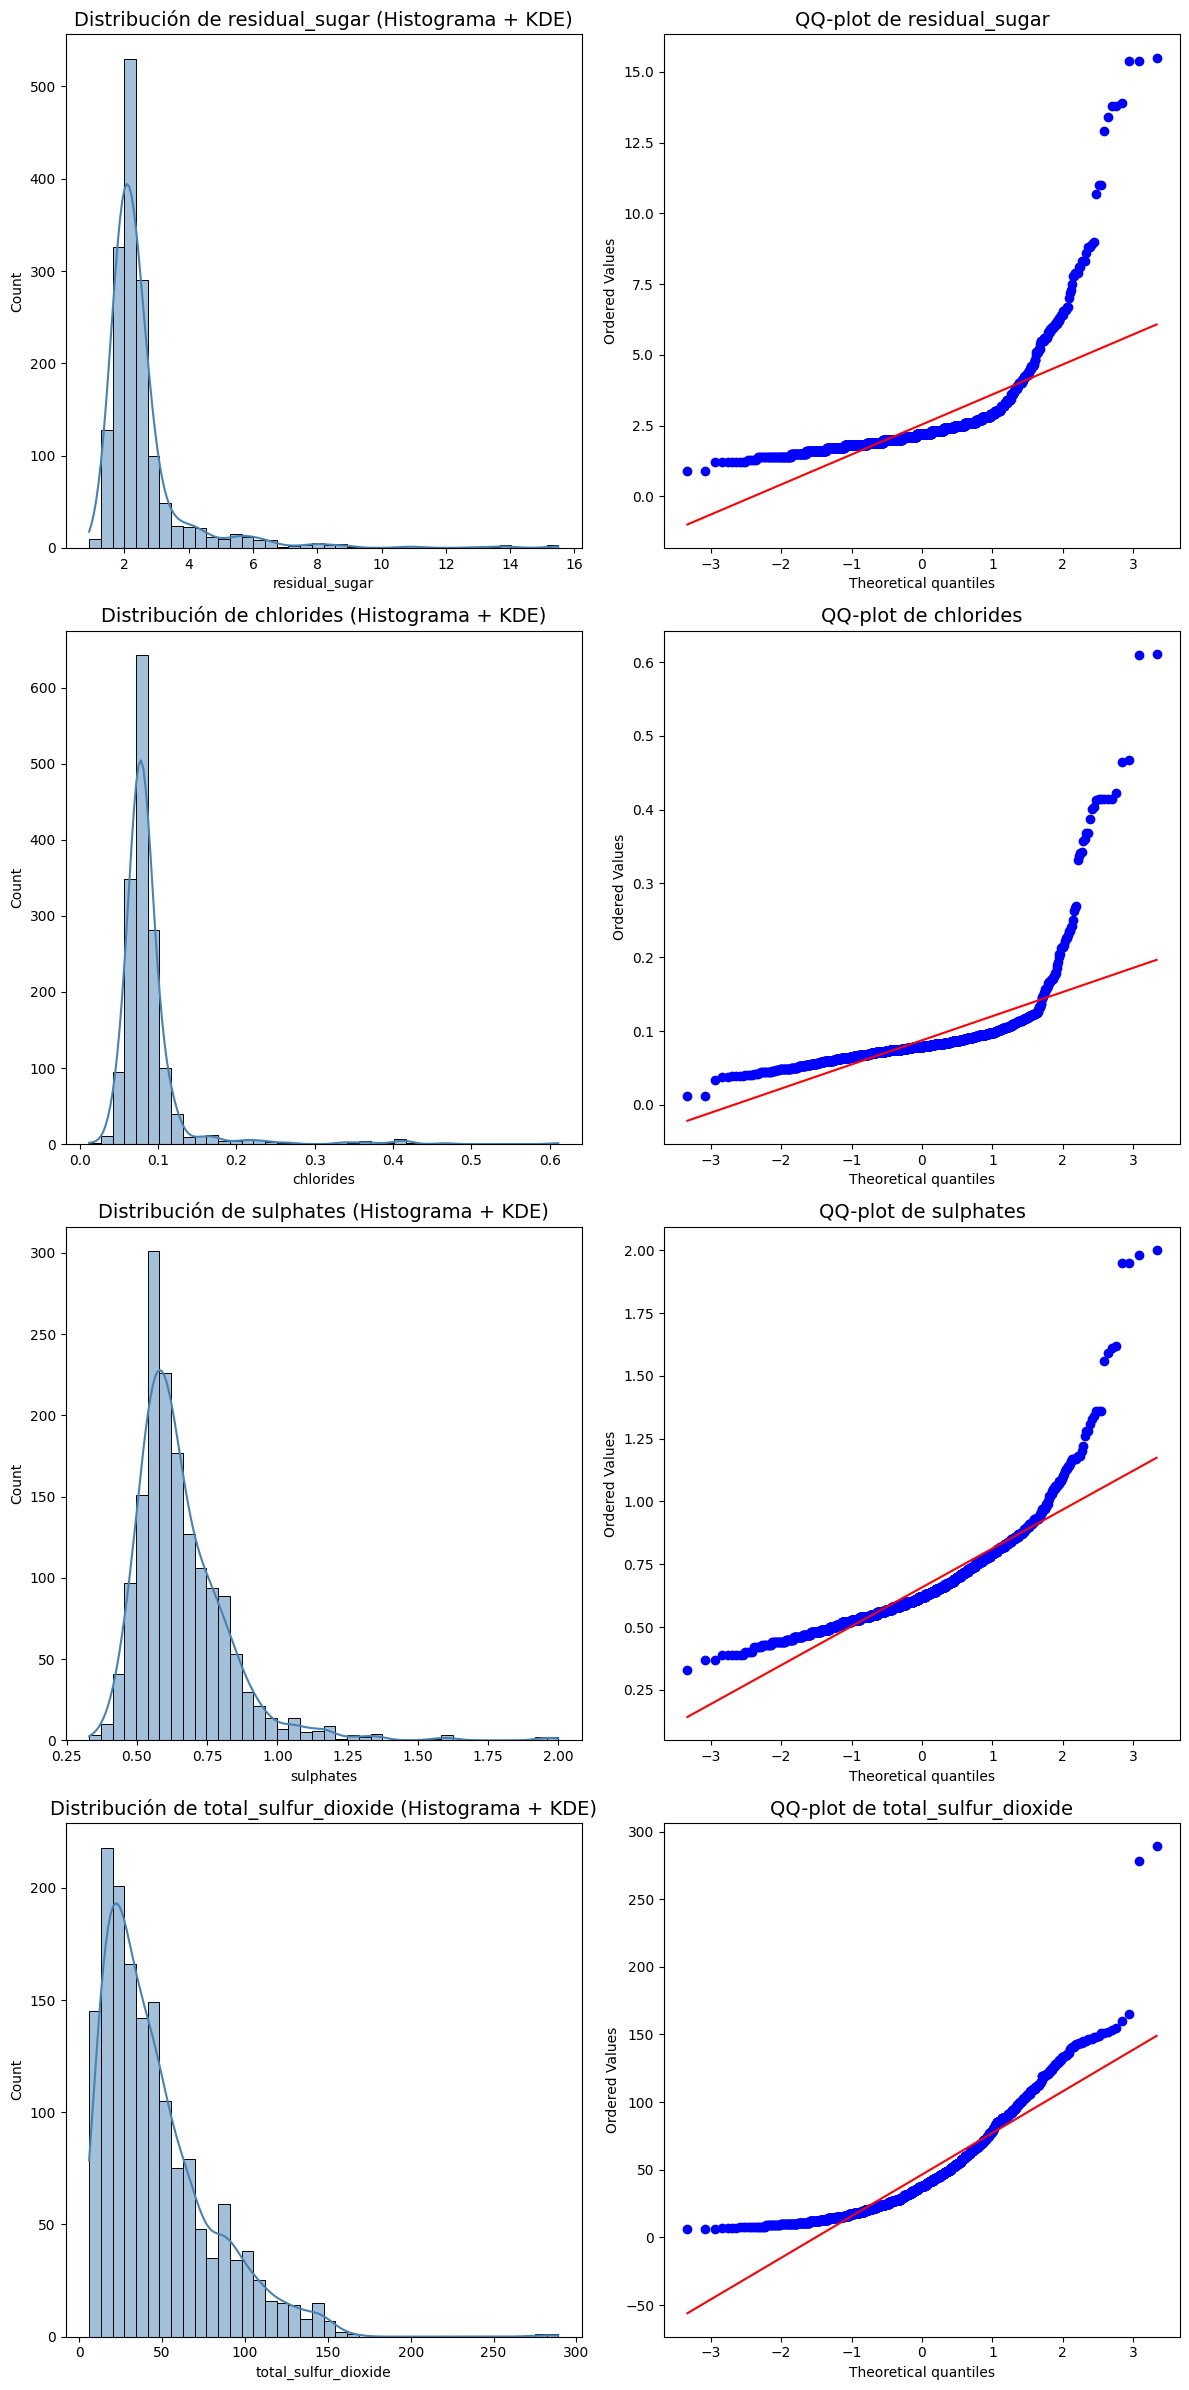

In [123]:
#para cada variable histograma + densidad + QQplot
import scipy.stats as stats

# Lista de variables a graficar
variables = ["residual_sugar", "chlorides", "sulphates", "total_sulfur_dioxide"]

# Crear figura
fig, axes = plt.subplots(len(variables), 2, figsize=(12, 6 * len(variables)))

for i, var in enumerate(variables):
    # Histograma + KDE
    sns.histplot(data=df, x=var, kde=True, ax=axes[i, 0], bins=40, color="steelblue")
    axes[i, 0].set_title(f"Distribución de {var} (Histograma + KDE)", fontsize=14)

    # QQ-plot
    stats.probplot(df[var], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"QQ-plot de {var}", fontsize=14)

plt.tight_layout()
plt.show()


In [124]:
#pruebas de normalidad para las variables: Shapiro, D´Agostino, Anderson
from scipy import stats
import statsmodels.api as sm

results_norm = []
for c in num_cols:
    x = df[c].dropna()

    sh = stats.shapiro(x)
    dag = stats.normaltest(x)   # D’Agostino & Pearson
    ad = stats.anderson(x, dist='norm')

    results_norm.append({
        "var": c,
        "shapiro_p": sh.pvalue,
        "dagostino_p": dag.pvalue,
        "anderson_stat": ad.statistic,
        "anderson_crit_5pct": ad.critical_values[2]  # ~5%
    })

norm_tbl = pd.DataFrame(results_norm).sort_values("shapiro_p")
norm_tbl


,var,shapiro_p,dagostino_p,anderson_stat,anderson_crit_5pct
4,chlorides,1.179056e-55,0.000000e+00,210.449187,0.785
3,residual_sugar,1.020162e-52,0.000000e+00,188.064449,0.785
9,sulphates,5.823140e-38,1.175907e-197,46.932195,0.785
6,total_sulfur_dioxide,3.573451e-34,1.433891e-106,52.488651,0.785
5,free_sulfur_dioxide,7.694597e-31,4.779365e-75,38.609910,0.785
10,alcohol,6.644057e-27,3.316329e-34,34.917064,0.785
0,fixed_acidity,1.525012e-24,1.752828e-49,28.142958,0.785
2,citric_acid,1.021932e-21,9.662822e-34,17.542087,0.785
1,volatile_acidity,2.692935e-16,7.192589e-32,5.683075,0.785
7,density,1.936052e-08,2.147320e-07,3.867595,0.785


INTERPRETACION DE LA TABLA

1)Shapiro-Wilk (shapiro_p)

Hipótesis nula (H0): la variable sigue una distribución normal.

Interpretación: Si p < 0.05 → rechazamos H0 → la variable no es normal.

Si p ≥ 0.05 → no rechazamos H0 → la variable podría ser normal.

En la tabla, todas las variables tienen p-values extremadamente pequeños (1e-24, 1e-55, etc.).
Conclusión: ninguna variable sigue una distribución normal según Shapiro-Wilk.

2)D’Agostino K² (dagostino_p)

También prueba normalidad, combinando asimetría y curtosis.

Misma lógica de interpretación de p-value que Shapiro.

En la tabla, todos los p-values son prácticamente 0.
Conclusión: ninguna variable es normal según D’Agostino K².

3)Anderson-Darling (anderson_stat vs anderson_crit_5pct)

Hipótesis nula (H0): la variable sigue una distribución normal.

La estadística calculada (anderson_stat) se compara con el valor crítico (anderson_crit_5pct) para un 5% de significancia:

Si anderson_stat > anderson_crit_5pct → rechazamos H0 → no normal

Si anderson_stat ≤ anderson_crit_5pct → no rechazamos H0 → posible normalidad

En la tabla: Ejemplo: chlorides → 210.449 > 0.785 → no es normal.

Todas las variables tienen estadísticos mucho mayores que 0.785.
Conclusión: ninguna variable es normal según Anderson-Darling.

4) Interpretación general

Todas las variables del dataset winequality-red no siguen una distribución normal.

Esto coincide con los QQ-plots que mostraron desviaciones de la línea diagonal.


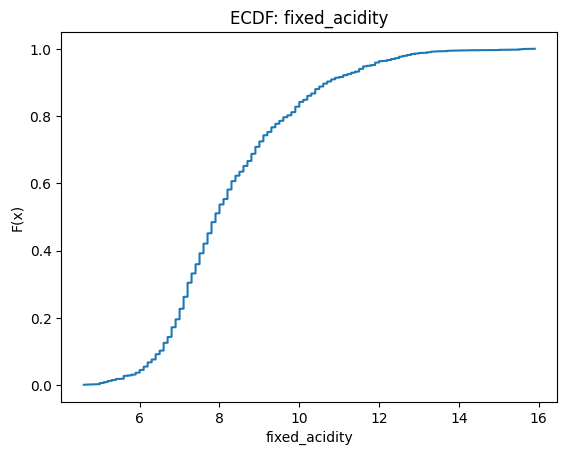

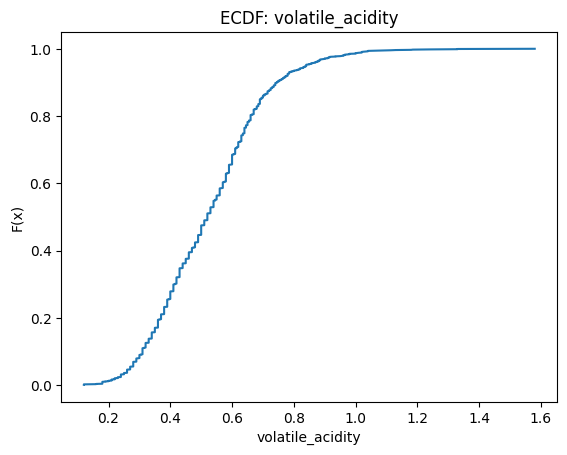

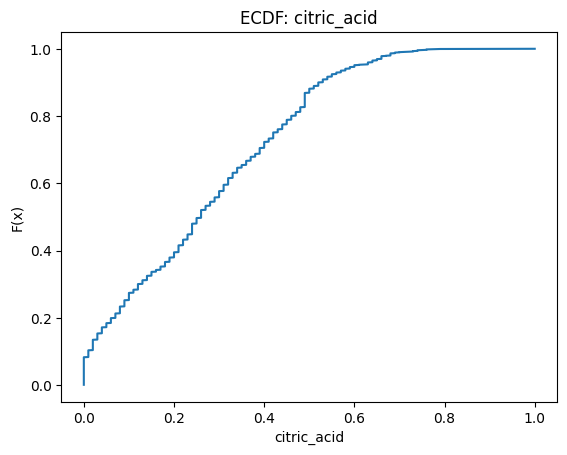

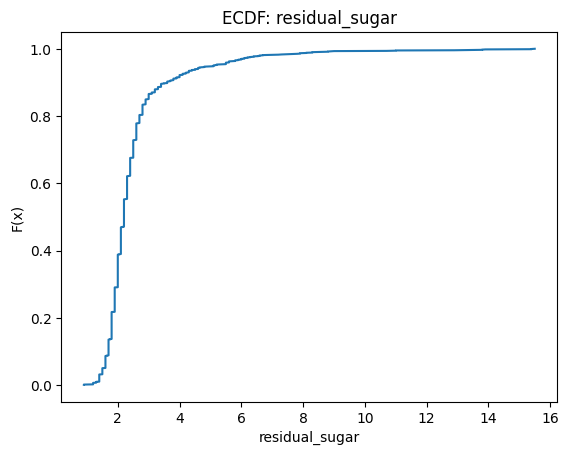

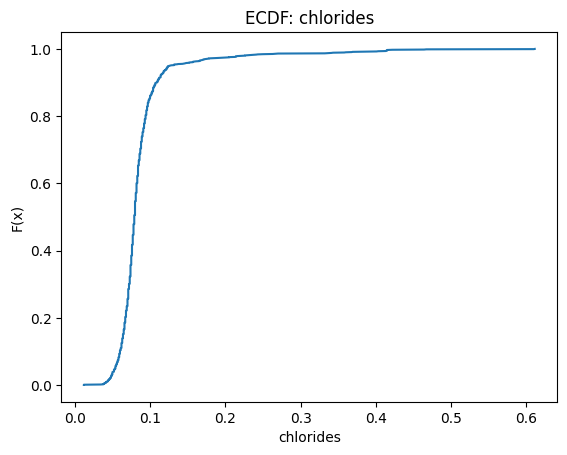

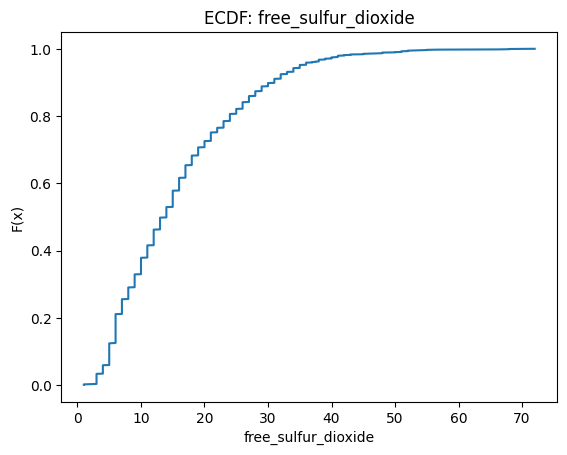

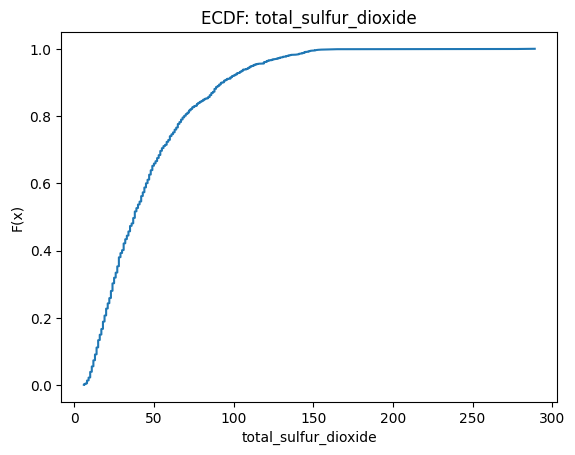

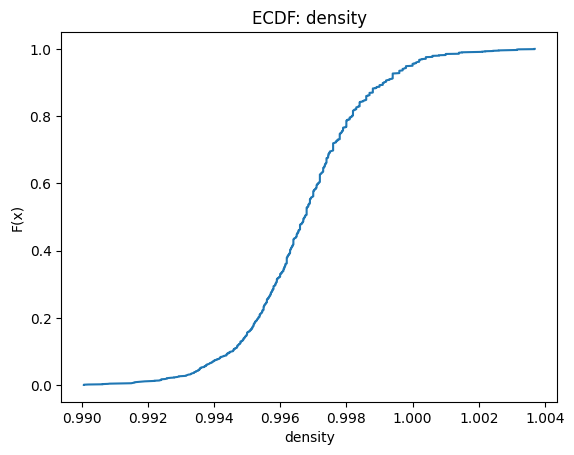

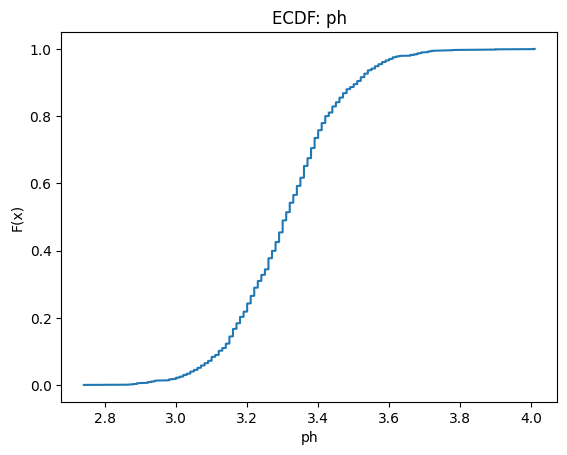

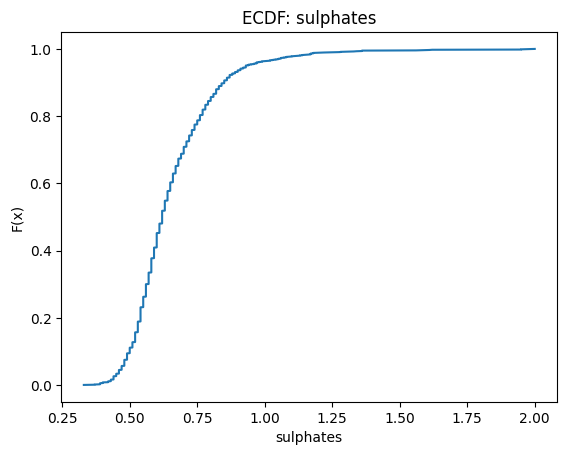

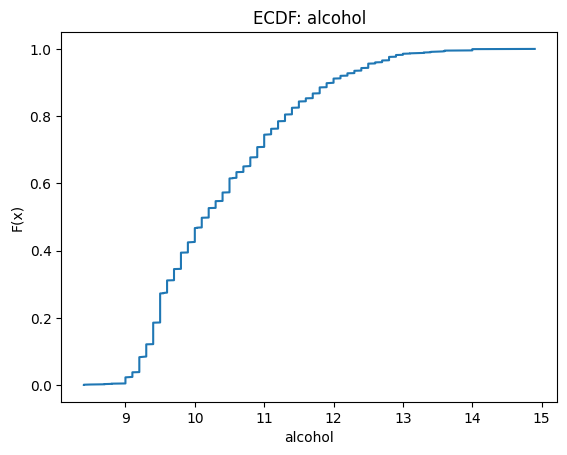

In [125]:
# seguimos con ECDF = Empirical Cumulative Distribution Function (indica la prop de datos que son menores o iguales a un valor dado.)
def ecdf(x):
    x = np.sort(x)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

for c in num_cols:
    xx, yy = ecdf(df[c].dropna())
    plt.plot(xx, yy)
    plt.title(f"ECDF: {c}")
    plt.xlabel(c); plt.ylabel("F(x)")
    plt.show()


INTERPRETACION:
las distribuciones son continuas porque no hay grandes saltos.
la forma sigmoidal indica normalidad, aplanada al inicio o al final o cambios bruscos son indicadores de asimetria (como se ve en la mayoria)

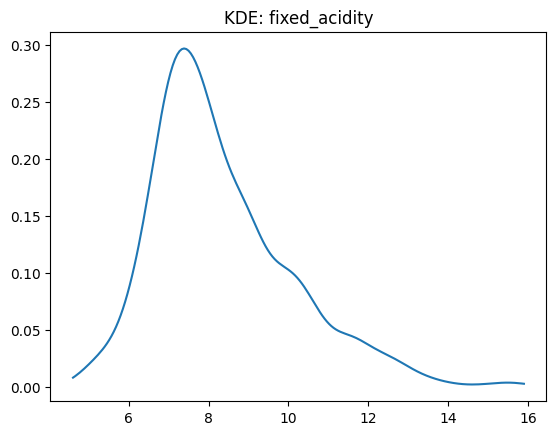

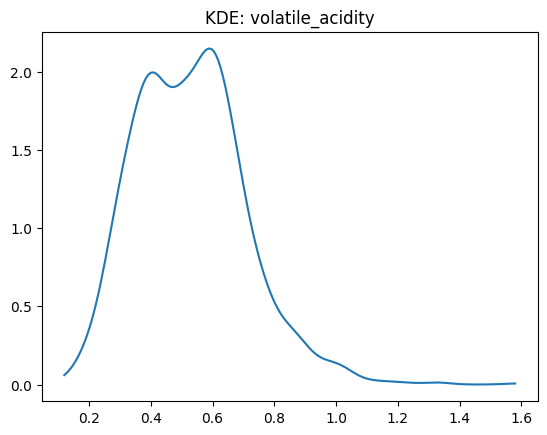

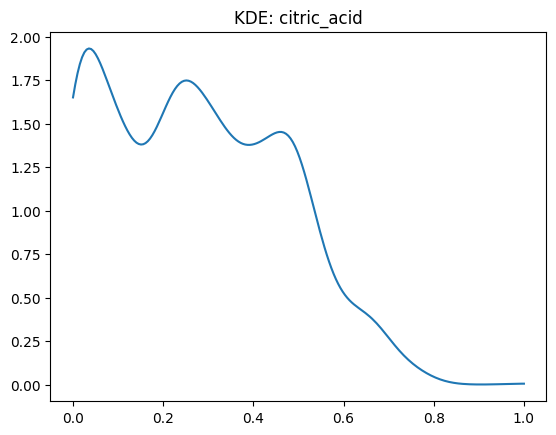

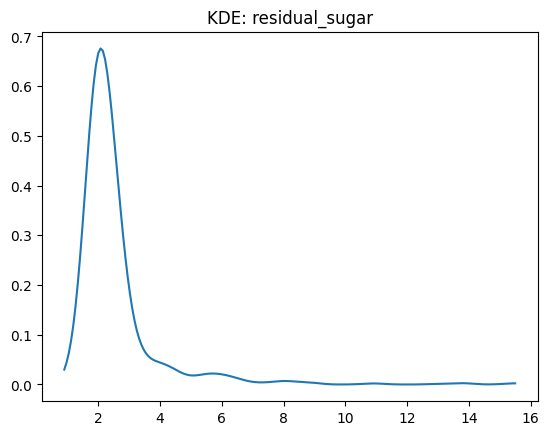

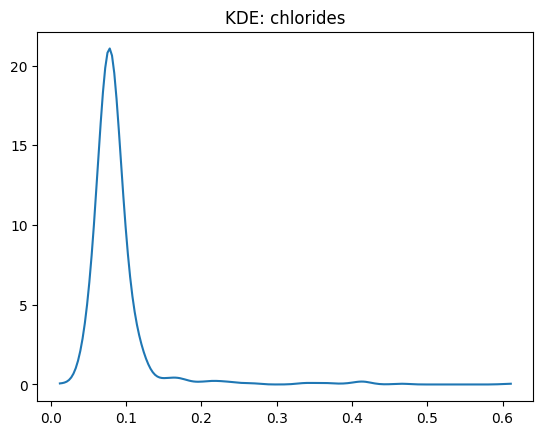

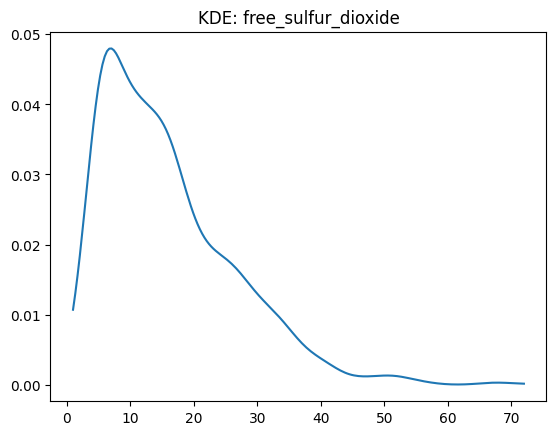

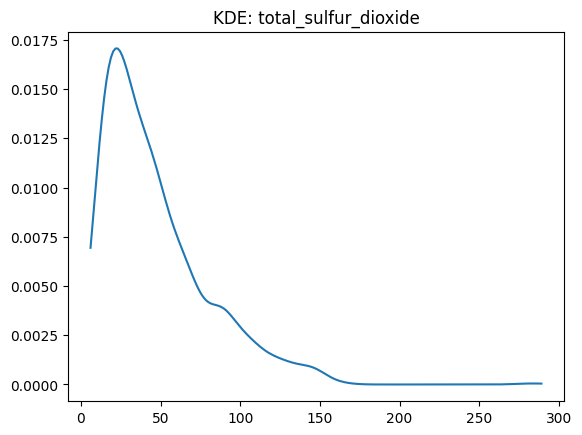

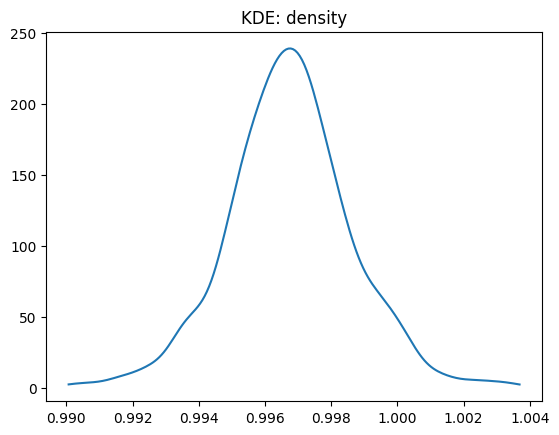

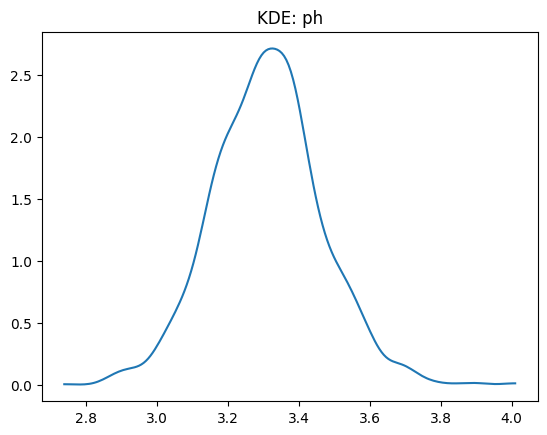

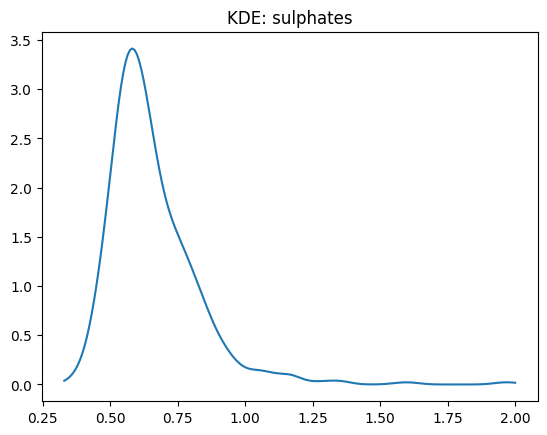

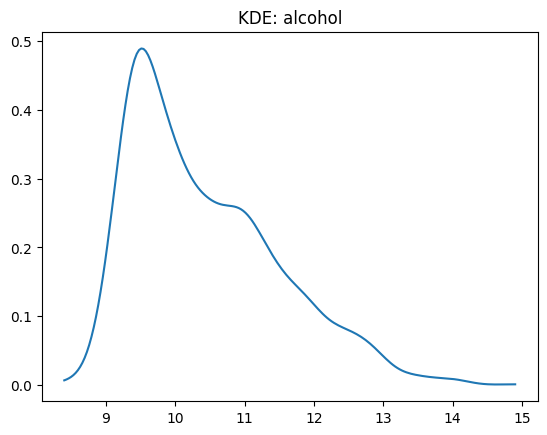

In [126]:
#vamos ahora con KDE (Kernel Density Estimations) si la distribucion es normal se ve como una gausiana
from scipy.stats import gaussian_kde

for c in num_cols:
    x = df[c].dropna().values
    kde = gaussian_kde(x)
    xs = np.linspace(x.min(), x.max(), 200)
    plt.plot(xs, kde(xs))
    plt.title(f"KDE: {c}")
    plt.show()


Interpretacion: las tendencias generales muestran que la mayoria de las variables no serian normales (solo density y ph tienen una distribucion casi gausiana). las que tienen varios picos es porque hay varias modas, como si fueran mezclas de subpoblaciones.

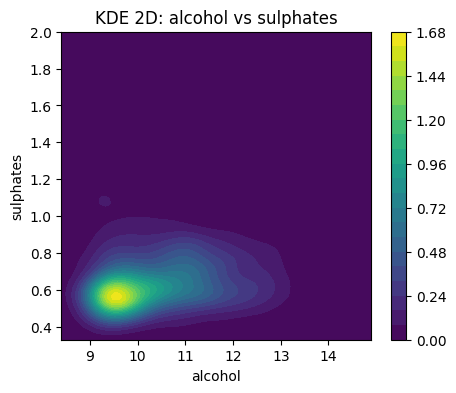

In [127]:
#vamos con KDE 2D: es la extensión de la KDE a dos variables
#En lugar de una curva, obtenemos un mapa de densidad en el plano XY.

x = df["alcohol"].values
y = df["sulphates"].values
xy = np.vstack([x,y])
kde2d = gaussian_kde(xy)
X, Y = np.meshgrid(np.linspace(x.min(), x.max(), 100),
                   np.linspace(y.min(), y.max(), 100))
Z = kde2d(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

plt.figure(figsize=(5,4))
plt.contourf(X, Y, Z, levels=20)
plt.xlabel("alcohol"); plt.ylabel("sulphates")
plt.title("KDE 2D: alcohol vs sulphates")
plt.colorbar()
plt.show()


Interpretacion: El punto amarillo fuerte indica la combinación más común de alcohol y sulphates

Si la forma es alargada diagonal → relación positiva o negativa:

Si la densidad se extiende de abajo izquierda a arriba derecha → a mayor alcohol, mayor sulphates (relación positiva).

Si de arriba izquierda a abajo derecha → relación negativa.

Si la densidad es más circular → relación débil o nula.

En este caso no se observa una tendencia clara

In [128]:
#vamos a transformar los datos a ver si conseguimos normalidad
from sklearn.preprocessing import PowerTransformer

# Yeo-Johnson (admite ceros/negativos)
pt = PowerTransformer(method='yeo-johnson', standardize=False)
df_pt = df.copy()
df_pt[num_cols] = pt.fit_transform(df[num_cols])

# Re-evaluar normalidad post-transformación

results_norm = []
for c in num_cols:
    x = df_pt[c].dropna()

    sh = stats.shapiro(x)
    dag = stats.normaltest(x)   # D’Agostino & Pearson
    ad = stats.anderson(x, dist='norm')

    results_norm.append({
        "var": c,
        "shapiro_p": sh.pvalue,
        "dagostino_p": dag.pvalue,
        "anderson_stat": ad.statistic,
        "anderson_crit_5pct": ad.critical_values[2]  # ~5%
    })

norm_tbl = pd.DataFrame(results_norm).sort_values("shapiro_p")
norm_tbl




,var,shapiro_p,dagostino_p,anderson_stat,anderson_crit_5pct
2,citric_acid,1.700568e-21,3.860397e-122,18.170976,0.785
4,chlorides,2.632619e-21,7.209221e-30,16.785673,0.785
10,alcohol,2.675763e-17,2.204359e-55,15.927436,0.785
3,residual_sugar,1.100046e-13,3.241323e-07,8.692235,0.785
5,free_sulfur_dioxide,2.825057e-11,1.240828e-16,6.933460,0.785
6,total_sulfur_dioxide,3.629623e-09,9.811563e-18,3.384584,0.785
7,density,2.758879e-08,4.856341e-07,3.756415,0.785
0,fixed_acidity,1.397073e-06,9.278212e-01,3.721771,0.785
8,ph,7.678866e-05,1.344277e-04,1.663667,0.785
1,volatile_acidity,4.702495e-04,5.295012e-01,2.683186,0.785


INTERRETACION: despues de la transformacion algunas variables mejoraron pero seguimos teniendo no normalidad

In [129]:
#Box-Cox es una transformación de potencia que se aplica a variables continuas positivas para acercarlas a una
#distribución normal y estabilizar su varianza. Solo funciona para valores positivos

from scipy.stats import boxcox

# Copiamos el DataFrame
df_boxcox = df.copy()

# Seleccionamos solo columnas numéricas
num_cols = df_boxcox.select_dtypes(include='number').columns

# Filtramos solo las columnas numéricas que son 100% positivas
positivas = [col for col in num_cols if (df_boxcox[col] > 0).all()]

# Diccionario para guardar los lambdas
boxcox_lambdas = {}

# Aplicamos Box-Cox
for col in positivas:
    df_boxcox[col], lam = boxcox(df_boxcox[col])
    boxcox_lambdas[col] = lam

# Revisamos los primeros registros
print(df_boxcox.head())

# Lambdas utilizados
print("Lambdas Box-Cox por variable:", boxcox_lambdas)


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0       1.103306         -0.332419         0.00        0.450049  -4.920401   
1       1.116874         -0.124623         0.00        0.572939  -4.140121   
2       1.116874         -0.259922         0.04        0.530233  -4.325636   
3       1.198255         -0.997735         0.56        0.450049  -4.963593   
4       1.103306         -0.332419         0.00        0.450049  -4.920401   

   free_sulfur_dioxide  total_sulfur_dioxide   density        ph  sulphates  \
0             2.867882              3.861490 -0.002222  1.232955  -0.801405   
1             4.102521              4.686835 -0.003247  1.143687  -0.476630   
2             3.317116              4.421290 -0.003042  1.161641  -0.546246   
3             3.504208              4.550629 -0.002018  1.131525  -0.737642   
4             2.867882              3.861490 -0.002222  1.232955  -0.801405   

    alcohol   quality  
0  0.300482  2.761806  
1  0.300

Antes: las variables estaban en sus unidades originales (alcohol en %, chlorides en g/L, etc.).

Después: Box-Cox aplica una transformación no lineal que busca:

Reducir la asimetría (skewness).

Acercar la distribución a normalidad.

Estabilizar la varianza.

la transformación “reescala” los datos para normalizarlos  (los datos originales no cambian).

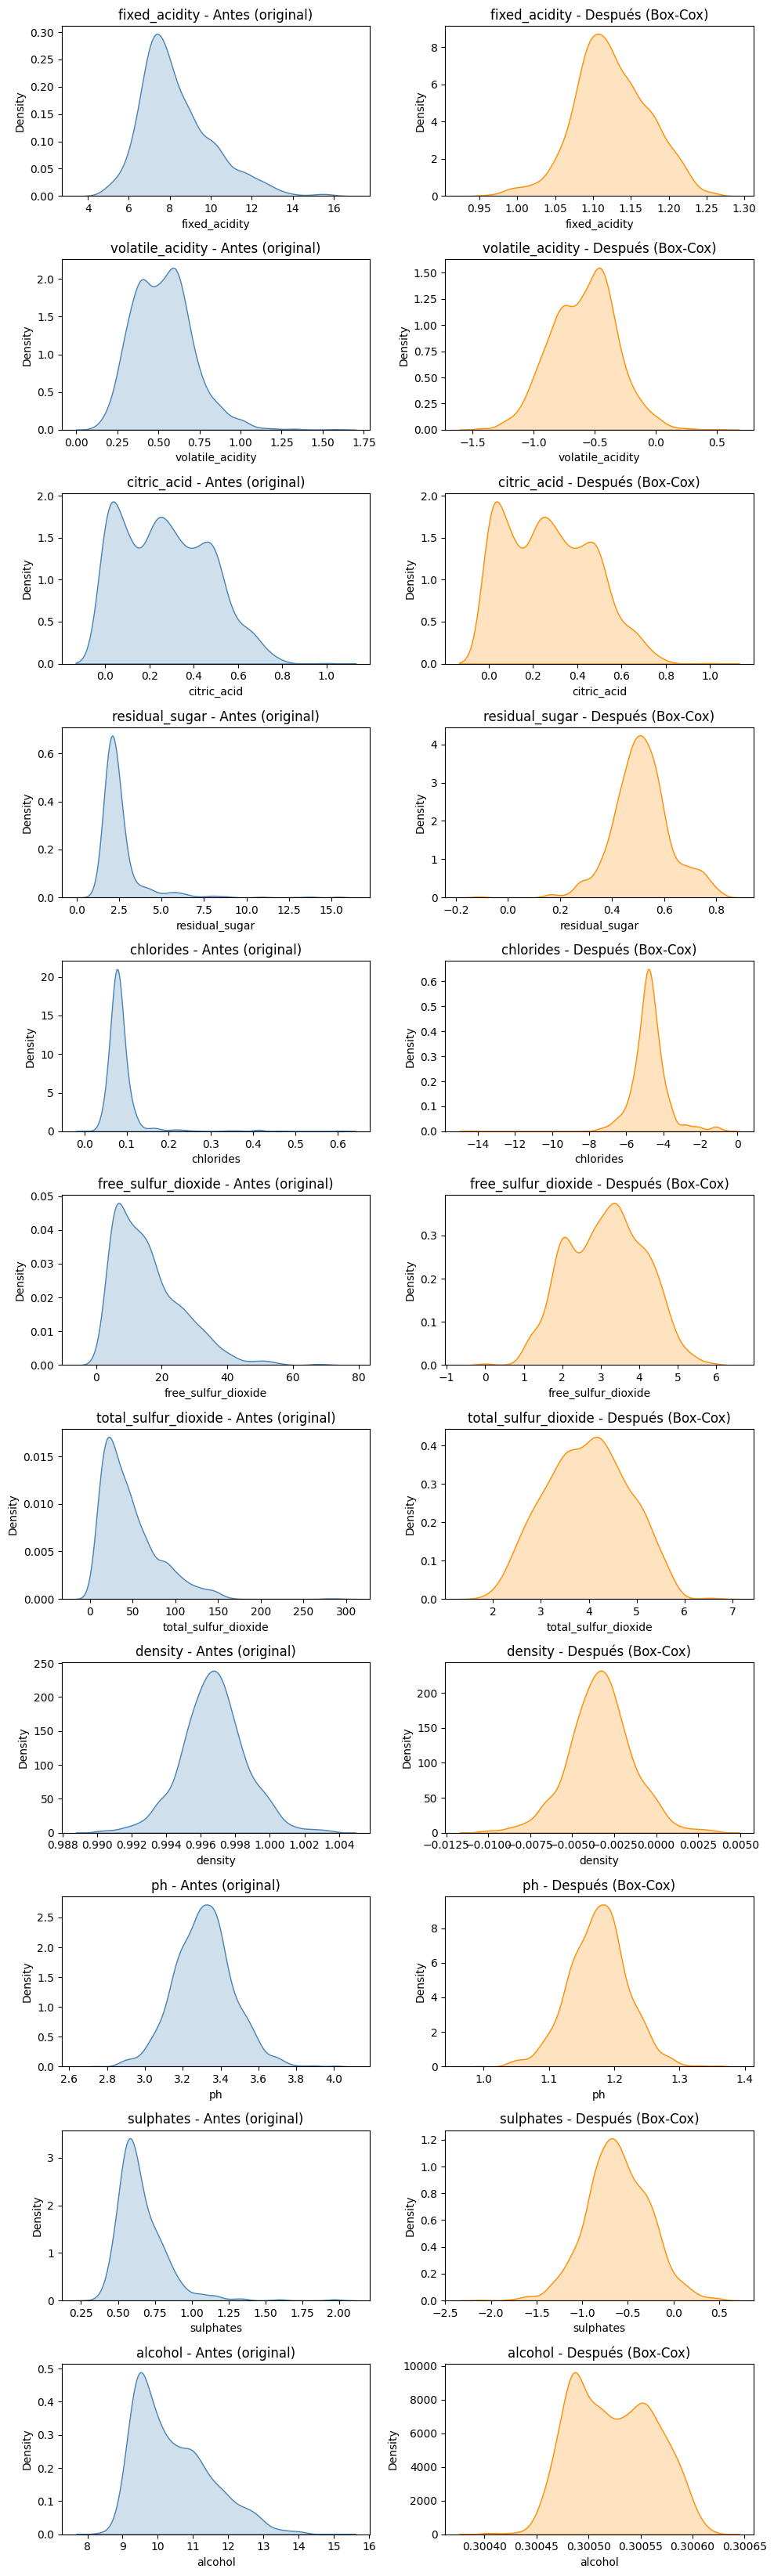

In [130]:
#Curvas de densidad (KDE) antes y despues de transformar datos
# Lista de columnas numéricas transformadas (excluimos quality y quality_bin)
variables = [col for col in df_boxcox.select_dtypes(include='number').columns if col not in ['quality']]

# Graficar KDE antes y después
fig, axes = plt.subplots(len(variables), 2, figsize=(10, 3*len(variables)))

for i, var in enumerate(variables):
    # Antes
    sns.kdeplot(df[var], ax=axes[i,0], fill=True, color="steelblue")
    axes[i,0].set_title(f"{var} - Antes (original)")

    # Después
    sns.kdeplot(df_boxcox[var], ax=axes[i,1], fill=True, color="darkorange")
    axes[i,1].set_title(f"{var} - Después (Box-Cox)")

plt.tight_layout()
plt.show()


In [131]:
#sigo sin haber normalizado completamente los datos#
#Bins de calidad: creo la variable quality_bin donde tomo quality y le asigno 1 rango (creo 3: baja, media, alta)

bins = [2,5,6,10] #2 a 5 es baja, 5 a 6 es media, 6 a 10 es alta
labels = ["baja","media","alta"]
df["quality_bin"] = pd.cut(df["quality"], bins=bins, labels=labels, include_lowest=True) #clasifico cada observacion

from scipy.stats import kruskal
#para cada col numerica agrupo segun Quality_bin y hago la KrusKal
kruskal_tbl = []
for c in num_cols:
    groups = [g.dropna().values for _, g in df.groupby("quality_bin")[c]]
    if all(len(g)>2 for g in groups): #minimo 3 observaciones
        stat, p = kruskal(*groups)
        kruskal_tbl.append({"var": c, "kruskal_p": p})
pd.DataFrame(kruskal_tbl).sort_values("kruskal_p")


/tmp/ipython-input-4287201645.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g.dropna().values for _, g in df.groupby("quality_bin")[c]]


,var,kruskal_p
11,quality,0.000000e+00
10,alcohol,2.492665e-88
9,sulphates,1.017822e-49
1,volatile_acidity,1.135000e-49
2,citric_acid,7.968567e-19
6,total_sulfur_dioxide,2.670190e-18
4,chlorides,1.160687e-14
7,density,2.194590e-13
0,fixed_acidity,1.331014e-06
5,free_sulfur_dioxide,1.196972e-03


INTERPRETACION: Cuanto más pequeño el p, mayor evidencia de que esa variable diferencia significativamente entre los grupos de calidad.

Si el p-valor es grande (ej. > 0.05), significa que no hay diferencias claras entre los grupos en esa variable.

En este caso se ordena de menor a mayor con lo cual alcohol es muy discriminate mientras que alcohol_residual no

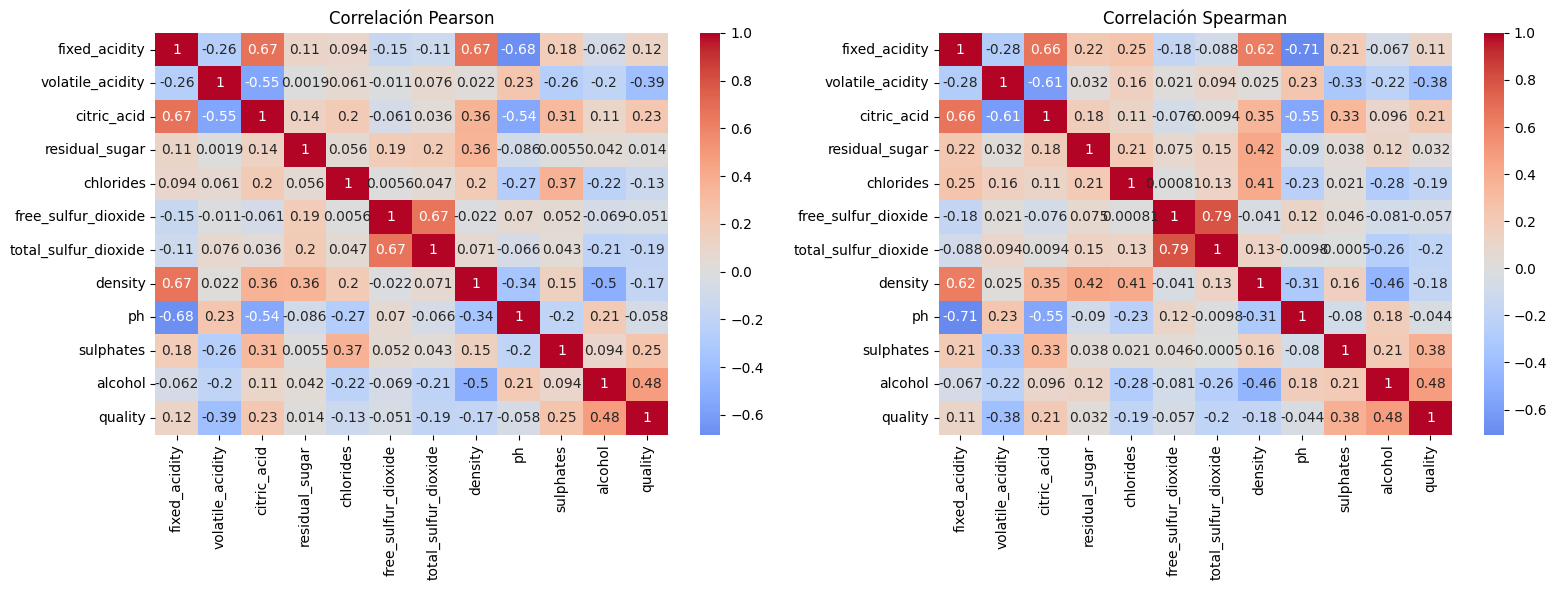

In [132]:
#Correlaciones: Pearson y SPearman

# Matriz de correlación de Pearson
corr_pearson = df[num_cols].corr(method="pearson")

# Matriz de correlación de Spearman
corr_spearman = df[num_cols].corr(method="spearman")

# Graficar heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16,6))

sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Correlación Pearson")

sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Correlación Spearman")

plt.tight_layout()
plt.show()


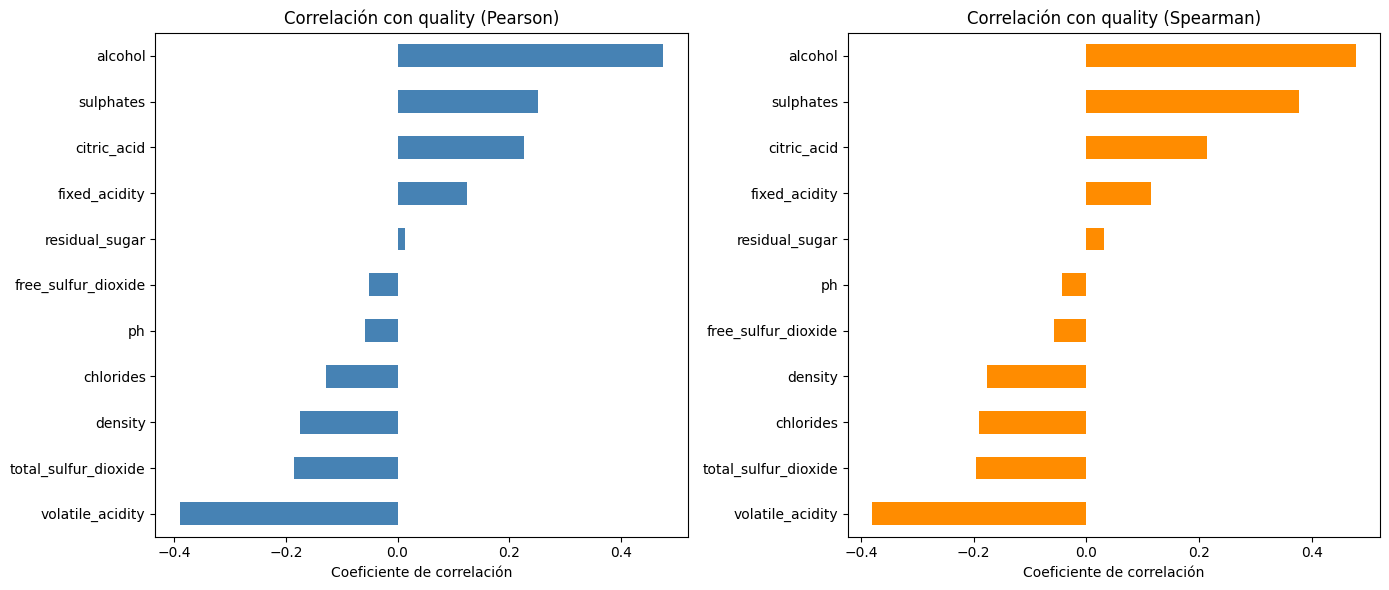

In [133]:
# Correlaciones con la variable objetivo 'quality'
corr_pearson_q = df[num_cols].corr(method="pearson")["quality"].drop("quality")
corr_spearman_q = df[num_cols].corr(method="spearman")["quality"].drop("quality")

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Pearson
corr_pearson_q.sort_values().plot(kind="barh", ax=axes[0], color="steelblue")
axes[0].set_title("Correlación con quality (Pearson)")
axes[0].set_xlabel("Coeficiente de correlación")

# Spearman
corr_spearman_q.sort_values().plot(kind="barh", ax=axes[1], color="darkorange")
axes[1].set_title("Correlación con quality (Spearman)")
axes[1].set_xlabel("Coeficiente de correlación")

plt.tight_layout()
plt.show()


In [134]:
#GaussianMixture: modelo probabilístico que asume que los datos provienen de una mezcla de distribuciones normales
#StandardScaler: estandariza las variables (media = 0, desviación estándar = 1).

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

X = df[num_cols].dropna().values
Xz = StandardScaler().fit_transform(X)

rows = []
for k in range(1,7):
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(Xz)
    rows.append({"k": k, "AIC": gmm.aic(Xz), "BIC": gmm.bic(Xz)})
pd.DataFrame(rows)


,k,AIC,BIC
0,1,45872.953902,46356.895937
1,2,39890.050955,40863.312158
2,3,37971.018114,39433.598484
3,4,37370.831143,39322.730681
4,5,36493.989754,38935.208459
5,6,36050.516508,38981.054381


INTERPRETACION: AIC (Akaike Information Criterion): penaliza complejidad, busca balance entre ajuste y simplicidad.

BIC (Bayesian Information Criterion): más estricto, penaliza fuertemente modelos con muchos parámetros.



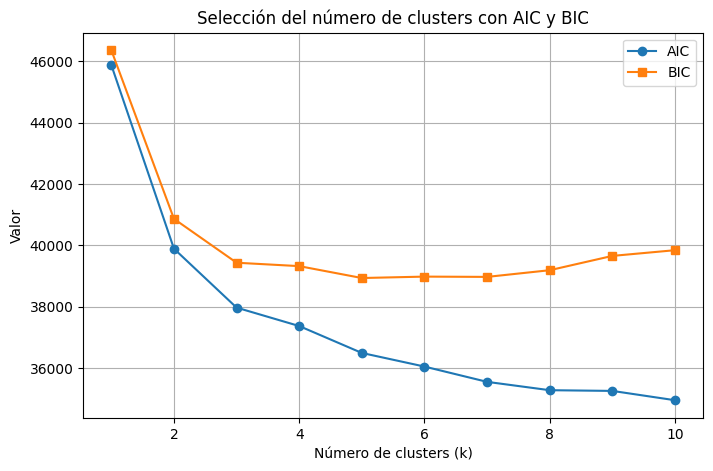

In [135]:
#Prueba del codo

# Seleccionar solo columnas numéricas y escalar
X = df[num_cols].dropna().values
Xz = StandardScaler().fit_transform(X)

# Guardar resultados de AIC y BIC
rows = []
for k in range(1, 11):  # probamos hasta 10 clusters
    gmm = GaussianMixture(n_components=k, covariance_type='full', random_state=42)
    gmm.fit(Xz)
    rows.append({"k": k, "AIC": gmm.aic(Xz), "BIC": gmm.bic(Xz)})

results = pd.DataFrame(rows)

# Graficar
plt.figure(figsize=(8,5))
plt.plot(results["k"], results["AIC"], marker='o', label="AIC")
plt.plot(results["k"], results["BIC"], marker='s', label="BIC")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Valor")
plt.title("Selección del número de clusters con AIC y BIC")
plt.legend()
plt.grid(True)
plt.show()



INTERPRETACION: de la prueba del codo deducimos que el mejor n de cluster es: Si buscas un modelo interpretativo y parsimonioso → me quedo con 3 clusters (BIC).

Si busco el mejor ajuste matemático sin importar complejidad → considero 6 clusters (AIC).

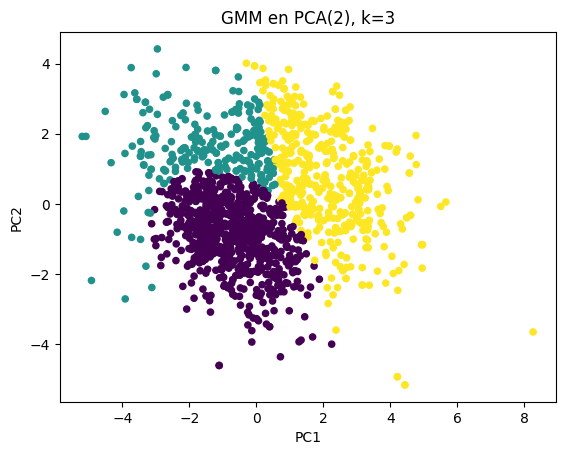

In [136]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xz)

best_k = 3  # ajusta tras ver AIC/BIC
gmm = GaussianMixture(n_components=best_k, random_state=42).fit(X2)
labels = gmm.predict(X2)

plt.scatter(X2[:,0], X2[:,1], c=labels, s=20)
plt.title(f"GMM en PCA(2), k={best_k}")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


INTERPRETACION: K=3 separa pero parece haber un traslape, de todas formas voy a usarlo para ajustar mi GMM

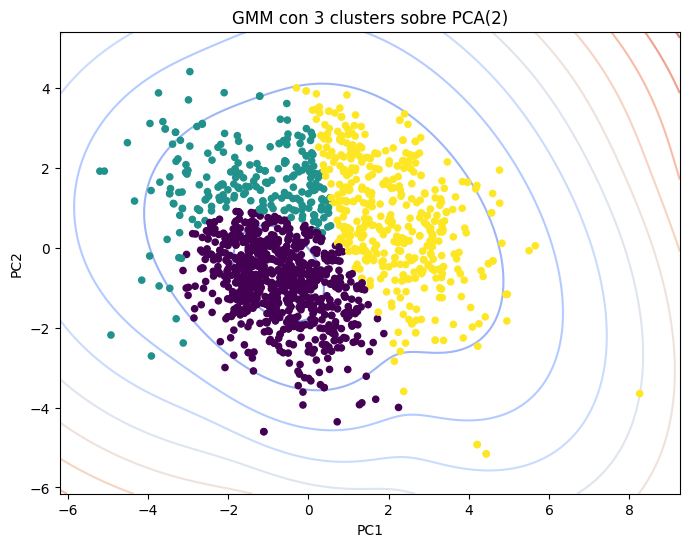

In [137]:


# Datos estandarizados
X = df[num_cols].dropna().values
Xz = StandardScaler().fit_transform(X)

# PCA a 2 componentes
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xz)

# Ajustar GMM
best_k = 3
gmm = GaussianMixture(n_components=best_k, random_state=42).fit(X2)
labels = gmm.predict(X2)

# Crear una malla para el contorno
x = np.linspace(X2[:,0].min()-1, X2[:,0].max()+1, 200)
y = np.linspace(X2[:,1].min()-1, X2[:,1].max()+1, 200)
Xgrid, Ygrid = np.meshgrid(x, y)
XY = np.column_stack([Xgrid.ravel(), Ygrid.ravel()])

# Obtener densidad de cada punto en la malla
Z = -gmm.score_samples(XY)
Z = Z.reshape(Xgrid.shape)

# Graficar scatter y contornos
plt.figure(figsize=(8,6))
plt.scatter(X2[:,0], X2[:,1], c=labels, s=20, cmap='viridis', zorder=2)
plt.contour(Xgrid, Ygrid, Z, levels=10, cmap='coolwarm', alpha=0.7, zorder=1)
plt.title(f"GMM con {best_k} clusters sobre PCA(2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


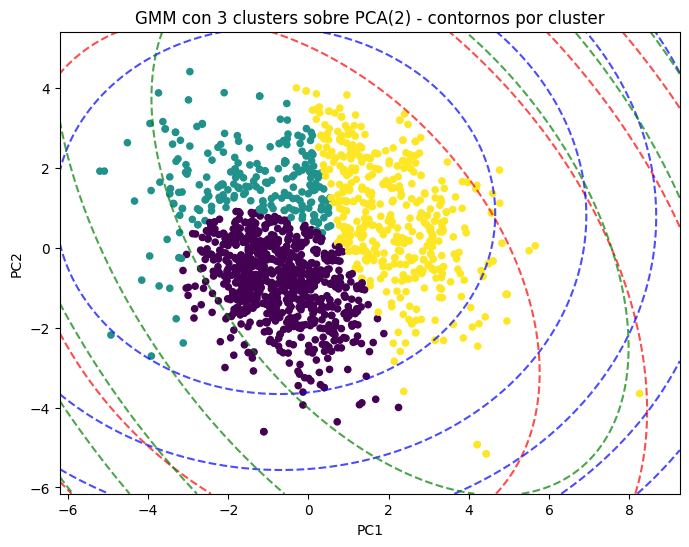

In [138]:


# Datos estandarizados
X = df[num_cols].dropna().values
Xz = StandardScaler().fit_transform(X)

# PCA a 2 componentes
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xz)

# Ajustar GMM
best_k = 3
gmm = GaussianMixture(n_components=best_k, random_state=42).fit(X2)
labels = gmm.predict(X2)

# Crear malla para contornos
x = np.linspace(X2[:,0].min()-1, X2[:,0].max()+1, 200)
y = np.linspace(X2[:,1].min()-1, X2[:,1].max()+1, 200)
Xgrid, Ygrid = np.meshgrid(x, y)
XY = np.column_stack([Xgrid.ravel(), Ygrid.ravel()])

# Graficar scatter
plt.figure(figsize=(8,6))
plt.scatter(X2[:,0], X2[:,1], c=labels, s=20, cmap='viridis', zorder=2)

# Contornos por cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
for i in range(best_k):
    # Crear máscara de la densidad de cada cluster
    Z = -gmm.score_samples(XY)  # densidad total
    # Obtener la contribución de cada cluster
    Z_cluster = -0.5 * np.sum(((XY - gmm.means_[i]) @ np.linalg.inv(gmm.covariances_[i])) * (XY - gmm.means_[i]), axis=1)
    Z_cluster = Z_cluster.reshape(Xgrid.shape)
    plt.contour(Xgrid, Ygrid, Z_cluster, levels=5, colors=colors[i], alpha=0.7)

plt.title(f"GMM con {best_k} clusters sobre PCA(2) - contornos por cluster")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [139]:
#calculo del centroide

# Datos originales y estandarizados
X = df[num_cols].dropna()
scaler = StandardScaler()
Xz = scaler.fit_transform(X)

# PCA a 2 componentes (para graficar si querés)
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xz)

# Ajustar GMM
best_k = 3
gmm = GaussianMixture(n_components=best_k, random_state=42).fit(X2)
labels = gmm.predict(X2)

# Centroides en el espacio PCA
centroids_pca = gmm.means_

# Transformar los centroides PCA a espacio estandarizado original
centroids_scaled = pca.inverse_transform(centroids_pca)

# Transformar los centroides a escala original de las variables
centroids_original = scaler.inverse_transform(centroids_scaled)

# Crear DataFrame para visualizar
centroids_df = pd.DataFrame(centroids_original, columns=num_cols)
centroids_df['cluster'] = range(best_k)
centroids_df


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,cluster
0,7.714585,0.611571,0.183790,2.596326,0.088312,18.461441,56.290118,0.996771,3.349857,0.612373,10.034263,5.255472,0
1,7.624363,0.510302,0.219788,2.155505,0.071434,13.733529,35.161476,0.995585,3.375775,0.639819,10.988380,5.918252,1
2,10.050736,0.392866,0.475340,2.787699,0.100692,13.179412,39.152107,0.997772,3.181733,0.757586,10.603986,6.062814,2


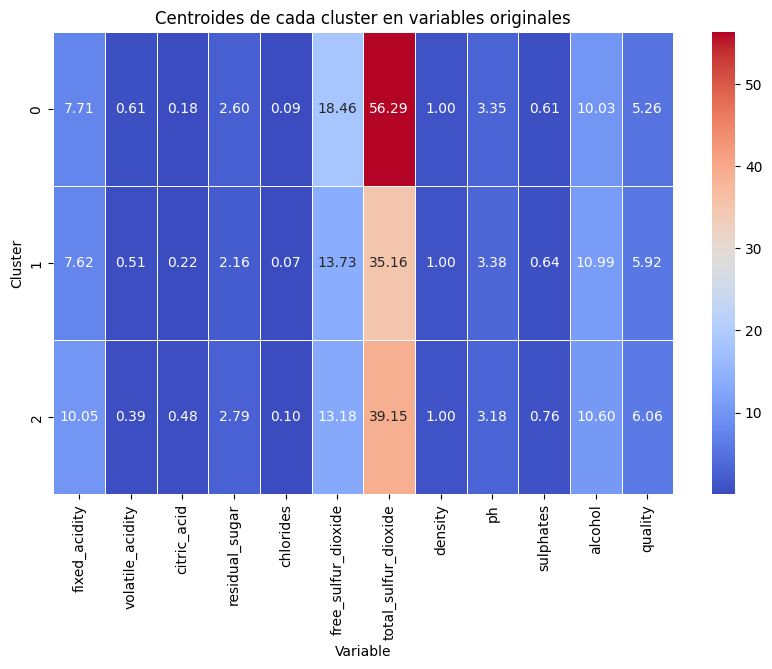

In [140]:

# centroids_df ya tiene los centroides y la columna 'cluster'
# Ponemos 'cluster' como índice
centroids_plot = centroids_df.set_index('cluster')

plt.figure(figsize=(10,6))
sns.heatmap(centroids_plot, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Centroides de cada cluster en variables originales")
plt.ylabel("Cluster")
plt.xlabel("Variable")
plt.show()


INTERPRETACION: puedo ver aqui que cada cluster refleja un perfil distinto de vino, basado en composición química y alcohol.

quality    3     4      5      6      7     8
cluster                                      
0        6.0  43.0  540.0  289.0    9.0   0.0
1        2.0   7.0   32.0  143.0   60.0   6.0
2        2.0   3.0  109.0  206.0  130.0  12.0


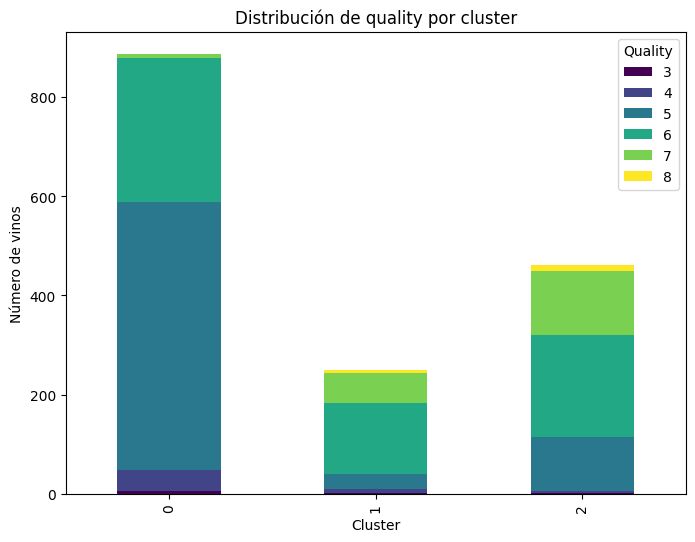

In [141]:
# Asegurarnos de tener los labels de los clusters en el DataFrame
df_clusters = df[num_cols].dropna().copy()
df_clusters['cluster'] = labels
df_clusters['quality'] = df.loc[df_clusters.index, 'quality']

# Tabla de conteo de quality por cluster
quality_per_cluster = df_clusters.groupby('cluster')['quality'].value_counts().unstack().fillna(0)
print(quality_per_cluster)

# Opcional: gráfico de barras apiladas
quality_per_cluster.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')
plt.title("Distribución de quality por cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos")
plt.legend(title="Quality")
plt.show()


INTERPRETACION: el cluster 0 tiene mas proporcion de calidad 4, 5 y 6.
En el cluster 1 tengo el menor n de conteos y en el cluster 2 tengo mas proporcion de 7 y 8

Ya con los cluster definidos podemos pasar a la parte predictiva

In [183]:
#definimos el target, en este caso los 3 clusters que analizamos para que sea un problema de clasificacion
#(si quisiera usar Quality del DF original seria un problema de regresion)

# Definir X_features correctamente (solo variables químicas)
X_features = df[num_cols].drop("quality", axis=1).copy()

# Agregar el cluster como feature opcional
X_features["cluster"] = labels  # labels provienen del GMM PCA, opcional

# Target sigue siendo la categoría de calidad
y = df["quality_bin"]  # "baja", "media", "alta"

# Verificación rápida
X_features.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [184]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42, stratify=y if 'quality_bin' in df.columns else None
)


In [185]:
from sklearn.ensemble import RandomForestClassifier

# Modelo
rf = RandomForestClassifier(
    n_estimators=200,      # cantidad de árboles
    max_depth=None,        # profundidad máxima, None = sin límite
    random_state=42
)

# Entrenamiento
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

              precision    recall  f1-score   support

        alta       0.78      0.58      0.67        43
        baja       0.80      0.85      0.82       149
       media       0.72      0.73      0.73       128

    accuracy                           0.77       320
   macro avg       0.77      0.72      0.74       320
weighted avg       0.77      0.77      0.76       320



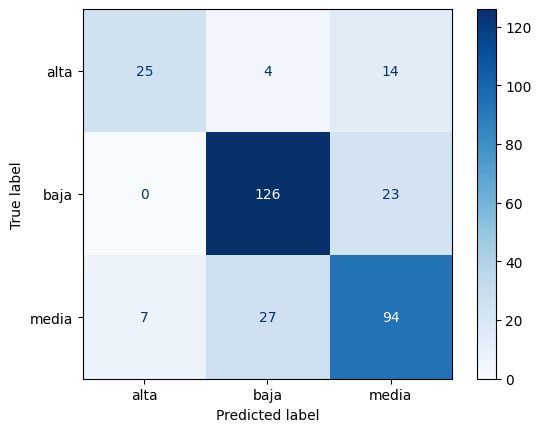

In [186]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicción
y_pred = rf.predict(X_test)

# Reporte de métricas
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.show()


INTERPRETACION: random forest clasifica bien, igual voy a probar y comparar el desempeño frente a otros modelos



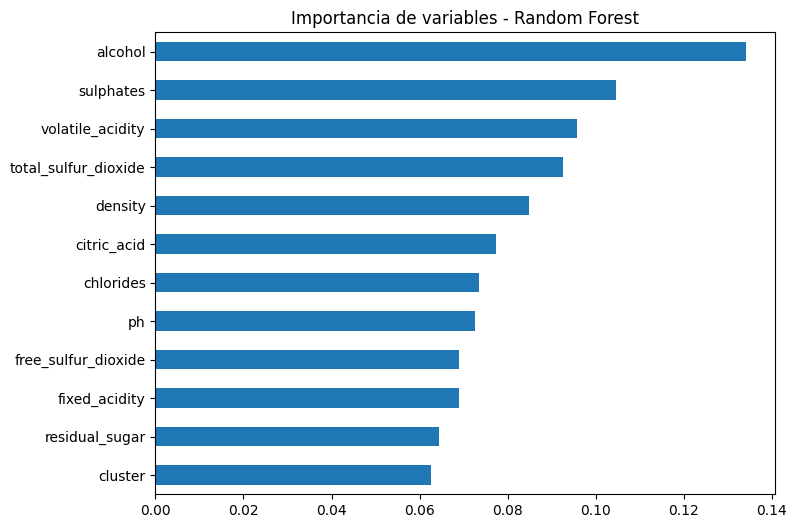

In [187]:
#para ver la inmportancia de cada variable en la clasificacion
feat_importances = pd.Series(rf.feature_importances_, index=X_features.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Importancia de variables - Random Forest")
plt.show()


In [188]:
#ahora vamos a usar un modelo GB
from sklearn.ensemble import GradientBoostingClassifier

# Modelo
gb = GradientBoostingClassifier(
    n_estimators=200,  # cantidad de árboles
    learning_rate=0.1,
    max_depth=3,       # profundidad de cada árbol
    random_state=42
)

# Entrenamiento
gb.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=200, random_state=42)

              precision    recall  f1-score   support

        alta       0.65      0.56      0.60        43
        baja       0.76      0.82      0.79       149
       media       0.66      0.63      0.65       128

    accuracy                           0.71       320
   macro avg       0.69      0.67      0.68       320
weighted avg       0.71      0.71      0.71       320



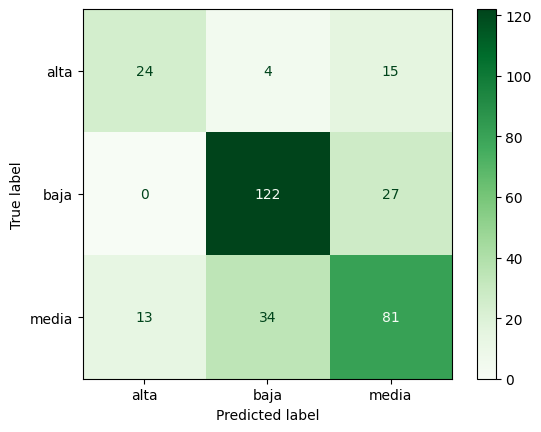

In [189]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicción
y_pred_gb = gb.predict(X_test)

# Reporte de métricas
print(classification_report(y_test, y_pred_gb))

# Matriz de confusión
cm_gb = confusion_matrix(y_test, y_pred_gb, labels=gb.classes_)
disp_gb = ConfusionMatrixDisplay(cm_gb, display_labels=gb.classes_)
disp_gb.plot(cmap='Greens', values_format='d')
plt.show()


INTERPRETACION: RF tiene mejor precision que LR

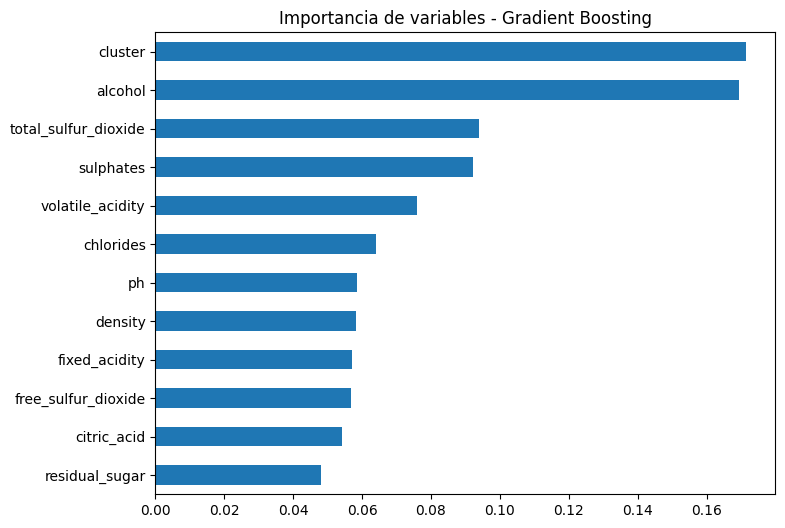

In [191]:
#importancia de cada caracteristica en GB

feat_importances_gb = pd.Series(gb.feature_importances_, index=X_features.columns)
feat_importances_gb.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Importancia de variables - Gradient Boosting")
plt.show()


INTERPRETACION: alcohol y cluster dominan en la prediccion, sin embargo en RF cluster es el ultimo en importancia

In [192]:
# Convertir a códigos numéricos
y_num = y.astype('category').cat.codes

# Guardar mapeo para volver a las etiquetas
label_mapping = dict(enumerate(y.astype('category').cat.categories))
print("Mapping clases:", label_mapping)


Mapping clases: {0: 'baja', 1: 'media', 2: 'alta'}


In [193]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(
    objective='multi:softprob',  # multiclass
    num_class=len(y.unique()),
    n_estimators=200,
    max_depth=3,
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False
)

# Entrenar usando los índices de X_train
xgb_clf.fit(X_train_array, y_num[X_train.index])


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:32:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=3, ...)

In [199]:
#ahora, en lugar de modelos de clasificacion, voy a usar quality para que sea un problema de regresion

# Features: solo variables químicas, excluyendo 'quality'
X_features = df[num_cols].drop("quality", axis=1)  # eliminar quality
y = df["quality"]  # target sigue siendo quality (regresión) o quality_bin (clasificación)

# Separar en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_features, y, test_size=0.2, random_state=42
)

# Verificar shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1279, 11)
X_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)


In [200]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Modelo
rf_reg = RandomForestRegressor(n_estimators=200, random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [201]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(n_estimators=200, random_state=42)
xgb_reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [202]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# RF
y_pred_rf = rf_reg.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("RF R²:", r2_score(y_test, y_pred_rf))
print("RF RMSE:", rmse_rf)
print("RF MAE:", mean_absolute_error(y_test, y_pred_rf))

# XGB
y_pred_xgb = xgb_reg.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGB R²:", r2_score(y_test, y_pred_xgb))
print("XGB RMSE:", rmse_xgb)
print("XGB MAE:", mean_absolute_error(y_test, y_pred_xgb))


RF R²: 0.5318838595914464
RF RMSE: 0.5530973156913709
RF MAE: 0.42514062499999994
XGB R²: 0.4615074396133423
XGB RMSE: 0.5932183646228115
XGB MAE: 0.413102924823761


INTERPRETACION DE LA REGRESION: R² = 0.553 y 0.46

In [206]:
#voy a probar de entrenar un modelo de regresion lineal a ver que tan bien funciona

from sklearn.linear_model import LinearRegression
X_features = df[num_cols].drop("quality", axis=1)

y = df["quality"]
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [207]:
lr = LinearRegression()

# R²
scores_lr = cross_val_score(lr, X_features, y, cv=kf, scoring='r2')

# RMSE y MAE
rmse_lr = np.sqrt(-cross_val_score(lr, X_features, y, cv=kf, scoring='neg_mean_squared_error'))
mae_lr = -cross_val_score(lr, X_features, y, cv=kf, scoring='neg_mean_absolute_error')

print("Linear Regression CV R²:", scores_lr.mean())
print("Linear Regression CV RMSE:", rmse_lr.mean())
print("Linear Regression CV MAE:", mae_lr.mean())


Linear Regression CV R²: 0.34241461809490154
Linear Regression CV RMSE: 0.6535764413508067
Linear Regression CV MAE: 0.5069545744455668


INTERPRETACION; R² = 0.34 como era de esperar LR tiene menor R2 que los otros modelos

In [208]:
#obtener SHAP de la RL

# Entrenar en todo el dataset
lr = LinearRegression()
lr.fit(X_features, y)

# Crear DataFrame de coeficientes
coef_df = pd.DataFrame({
    "feature": X_features.columns,
    "coefficient": lr.coef_
}).sort_values(by="coefficient", key=abs, ascending=False)

print(coef_df)


                 feature  coefficient
7                density   -17.881164
4              chlorides    -1.874225
1       volatile_acidity    -1.083590
9              sulphates     0.916334
8                     ph    -0.413653
10               alcohol     0.276198
2            citric_acid    -0.182564
0          fixed_acidity     0.024991
3         residual_sugar     0.016331
5    free_sulfur_dioxide     0.004361
6   total_sulfur_dioxide    -0.003265


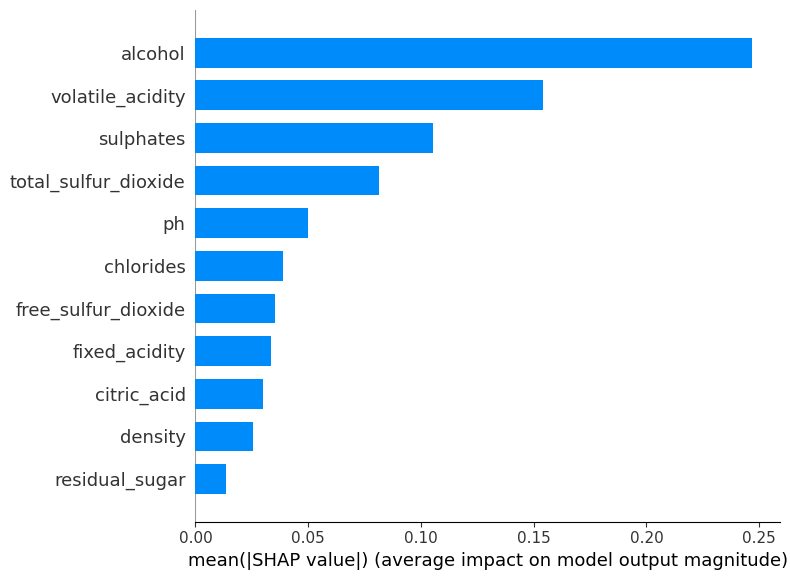

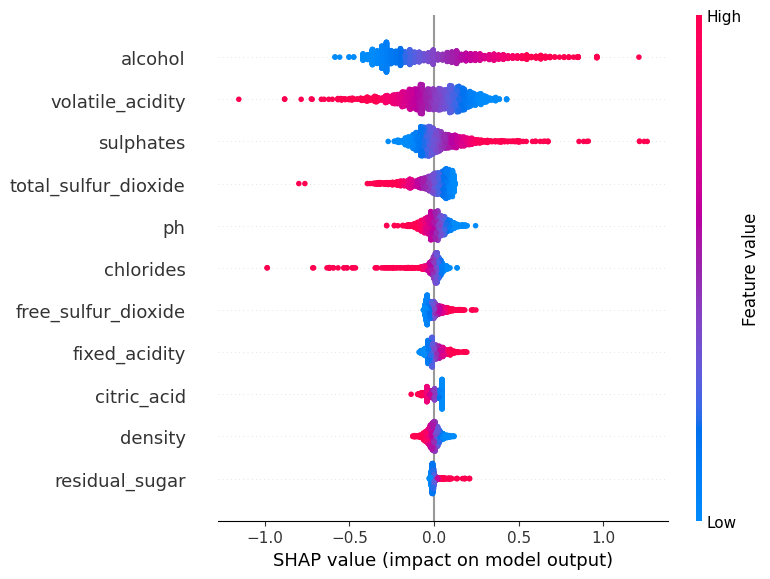

In [209]:

explainer = shap.Explainer(lr, X_features)
shap_values = explainer(X_features)

# Resumen global
shap.summary_plot(shap_values, X_features, plot_type="bar")
shap.summary_plot(shap_values, X_features)


In [210]:
coef_df = pd.DataFrame({
    "feature": X_features.columns,
    "linear_coef": lr.coef_
})


In [211]:
rf_reg = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)
rf_reg.fit(X_features, y)

rf_feat = pd.DataFrame({
    "feature": X_features.columns,
    "rf_importance": rf_reg.feature_importances_
})


In [212]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    random_state=42
)
xgb_reg.fit(X_features, y)

xgb_feat = pd.DataFrame({
    "feature": X_features.columns,
    "xgb_importance": xgb_reg.feature_importances_
})


In [213]:
feat_compare = coef_df.merge(rf_feat, on="feature").merge(xgb_feat, on="feature")
feat_compare


,feature,linear_coef,rf_importance,xgb_importance
0,fixed_acidity,0.024991,0.029607,0.040201
1,volatile_acidity,-1.083590,0.152897,0.094721
2,citric_acid,-0.182564,0.019352,0.047259
3,residual_sugar,0.016331,0.013967,0.047758
4,chlorides,-1.874225,0.024390,0.053325
5,free_sulfur_dioxide,0.004361,0.021974,0.054512
6,total_sulfur_dioxide,-0.003265,0.054834,0.076610
7,density,-17.881164,0.014552,0.047310
8,ph,-0.413653,0.023658,0.058402
9,sulphates,0.916334,0.186796,0.149352


INTERPRETACION: sulphates y alcohol dominan

In [214]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error


kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Random Forest
rf_r2 = cross_val_score(rf_reg, X_features, y, cv=kf, scoring="r2").mean()
rf_rmse = np.sqrt(-cross_val_score(rf_reg, X_features, y, cv=kf, scoring="neg_mean_squared_error")).mean()
rf_mae = -cross_val_score(rf_reg, X_features, y, cv=kf, scoring="neg_mean_absolute_error").mean()

# XGBoost
xgb_r2 = cross_val_score(xgb_reg, X_features, y, cv=kf, scoring="r2").mean()
xgb_rmse = np.sqrt(-cross_val_score(xgb_reg, X_features, y, cv=kf, scoring="neg_mean_squared_error")).mean()
xgb_mae = -cross_val_score(xgb_reg, X_features, y, cv=kf, scoring="neg_mean_absolute_error").mean()

print("Random Forest CV R²:", rf_r2)
print("Random Forest CV RMSE:", rf_rmse)
print("Random Forest CV MAE:", rf_mae)
print("XGB CV R²:", xgb_r2)
print("XGB CV RMSE:", xgb_rmse)
print("XGB CV MAE:", xgb_mae)


Random Forest CV R²: 0.4019480242675194
Random Forest CV RMSE: 0.6235354613384964
Random Forest CV MAE: 0.4882005903089495
XGB CV R²: 0.45056461095809935
XGB CV RMSE: 0.5976644920083172
XGB CV MAE: 0.4286709249019623


 99%|===================| 1578/1599 [00:18<00:00]       

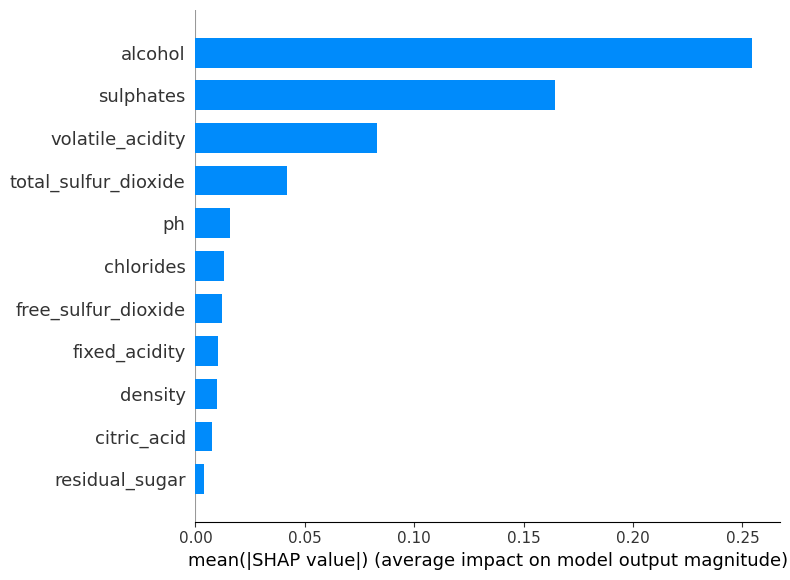

 97%|=================== | 1556/1599 [00:11<00:00]       

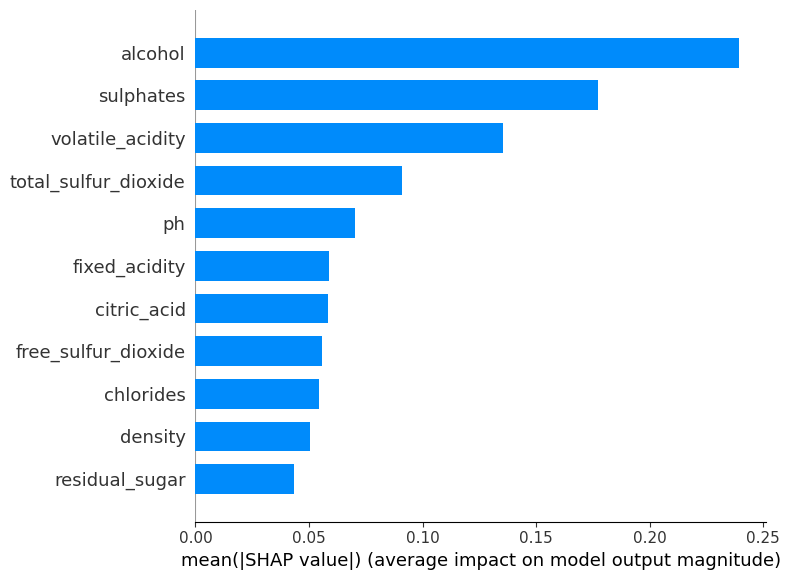

In [215]:
#SHAP

# Random Forest
explainer_rf = shap.Explainer(rf_reg, X_features)
shap_values_rf = explainer_rf(X_features)
shap.summary_plot(shap_values_rf, X_features, plot_type="bar")

# XGBoost
explainer_xgb = shap.Explainer(xgb_reg, X_features)
shap_values_xgb = explainer_xgb(X_features)
shap.summary_plot(shap_values_xgb, X_features, plot_type="bar")


 93%|=================== | 1494/1599 [00:18<00:01]       

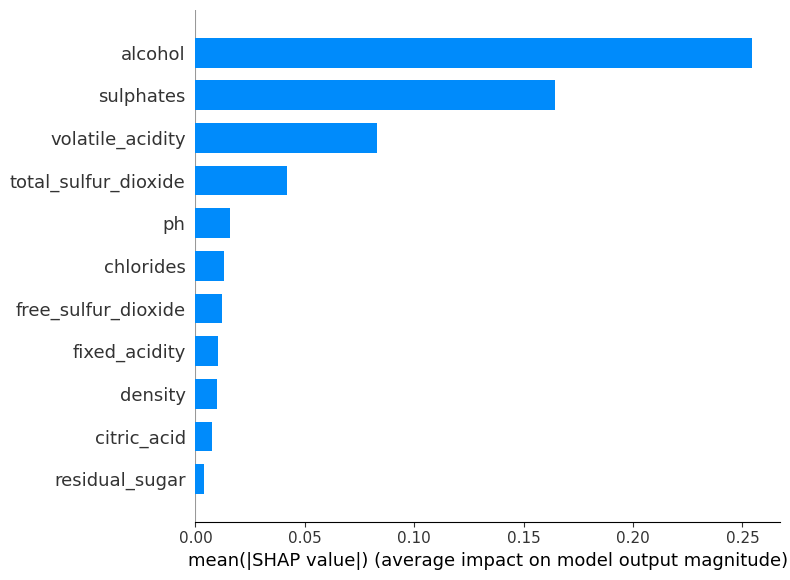

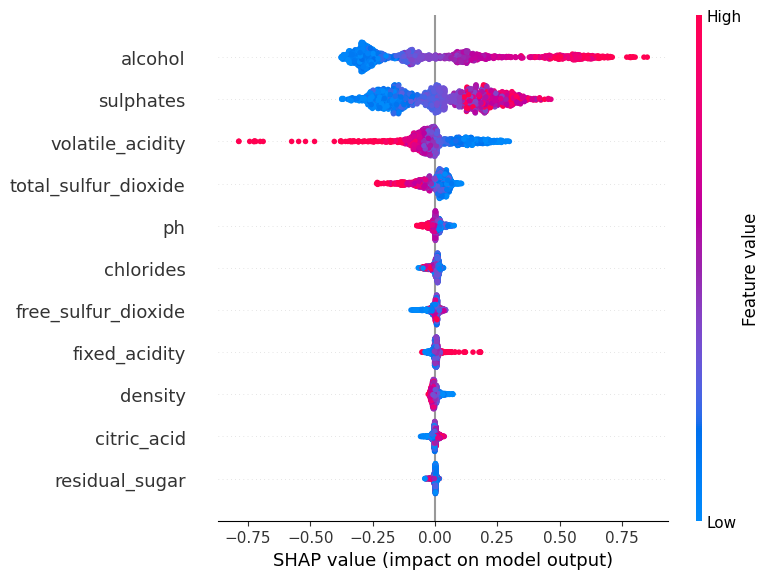

In [182]:


# Explicador para Random Forest
explainer_rf = shap.Explainer(rf_reg, X_features)
shap_values_rf = explainer_rf(X_features)

# Resumen global en gráfico de barras
shap.summary_plot(shap_values_rf, X_features, plot_type="bar")

# Resumen clásico
shap.summary_plot(shap_values_rf, X_features)


In [216]:
#ya para terminar, vamos a hacer una mejora de hiperparametros
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"]
}


In [217]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="r2",   # para regresión
    n_jobs=-1,
    verbose=1
)


In [218]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
445 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [221]:
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor R² en CV:", grid_search.best_score_)

# Modelo final con los mejores parámetros
best_rf = grid_search.best_estimator_

# Evaluar en test
y_pred = best_rf.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("Test R²:", r2_score(y_test, y_pred))
print("Test RMSE:", mean_squared_error(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))


Mejores parámetros: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor R² en CV: 0.4421435175601168
Test R²: 0.5432893761276596
Test RMSE: 0.2984630687393863
Test MAE: 0.4207939914909858


INTERPRETACION: n_estimators=300: más árboles ayudan a estabilizar la predicción.

max_depth=15: profundidad moderada evita underfitting y controla overfitting.

max_features='sqrt': cada árbol solo mira un subconjunto de features, mejora generalización.

min_samples_split=2 y min_samples_leaf=1: splits mínimos, mantiene detalle en los árboles.

R² en CV: 0.44 → el modelo explica ~44% de la varianza en validación cruzada, lo que indica que predecir quality solo con variables químicas es moderadamente difícil.

R² en test: 0.54 → ligeramente mejor que en CV, buen ajuste general.

RMSE=0.30 y MAE=0.42 → errores moderados en la escala de calidad (0-10), razonables para un dataset químico de vinos.

In [222]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Definir modelo con los mejores parámetros
best_rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42
)

# Entrenar
best_rf.fit(X_train, y_train)

# Predecir en test
y_pred = best_rf.predict(X_test)

# Evaluar
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Random Forest Optimizado")
print("Test R²:", r2)
print("Test RMSE:", rmse)
print("Test MAE:", mae)


Random Forest Optimizado
Test R²: 0.5432893761276596
Test RMSE: 0.5463177360651824
Test MAE: 0.4207939914909858


INTERPRETACION: R² = 0.54 → el modelo explica alrededor del 54% de la varianza de quality. Es un valor moderadamente bueno, considerando que solo usamos variables químicas.

RMSE ≈ 0.55 y MAE ≈ 0.42 → errores razonables en la escala de calidad (0 a 10).

Entrenar con los mejores hiperparámetros estabilizó el modelo, pero no incrementó dramáticamente R².

Esto indica que la limitación real no es el modelo, sino la información disponible en las variables químicas: no podemos predecir perfectamente la calidad sin incluir otras características externas (como percepción sensorial, bodega, etc.).



In [223]:
#por ultimo, SHAP con el RF optimizado

# Crear el explainer
explainer = shap.TreeExplainer(best_rf)

# Calcular los valores SHAP
shap_values = explainer.shap_values(X_test)


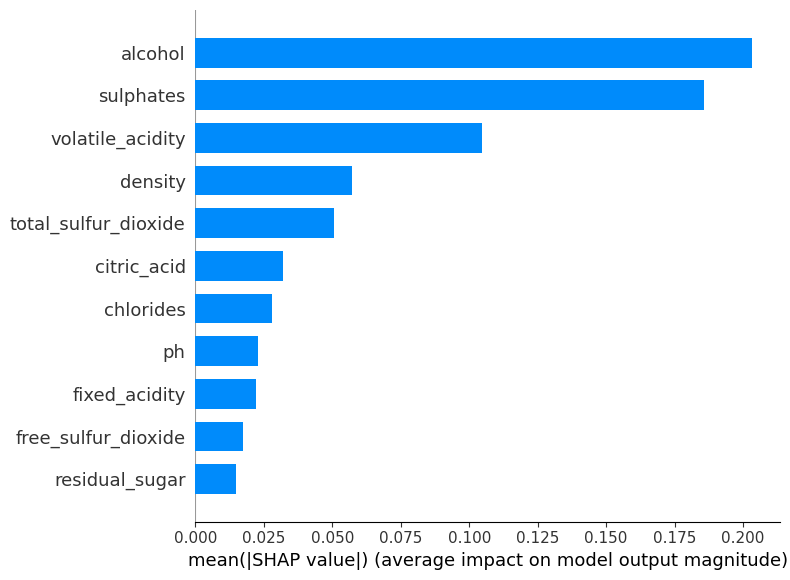

In [224]:
# Plot resumen global
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_test.columns)


Las variables que mas afectan son alcohol, sulfatos y volatile_acidity